Calibration data from 05/03/2025
Co-57 cal source

Tb = 80 mK, bias = -3.5 V

In [1]:
import mass
import numpy as np
#import pylab as plt
import scipy as sp
import glob
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\kmm6\Documents\pax_data"
date = '20250503'
noise = '0010'
run = '0012'

In [4]:
    # load data
    pulsePattern = sorted(glob.glob(path + "\\"+date+"\\"+run+'\\'+date+'_run'+run+'_chan*.ljh'))
    noisePattern = sorted(glob.glob(path + '\\'+date+'\\'+noise+'\\'+date+'_run'+noise+'_chan*.ljh'))
    data = mass.TESGroup(pulsePattern, noisePattern)

C:\Users\kmm6\Documents\pax_data\20250503\0012\20250503_run0012_chan102.ljh 31479


C:\Users\kmm6\Documents\pax_data\20250503\0012\20250503_run0012_chan103.ljh 31457
C:\Users\kmm6\Documents\pax_data\20250503\0012\20250503_run0012_chan105.ljh 32907
C:\Users\kmm6\Documents\pax_data\20250503\0012\20250503_run0012_chan106.ljh 33327
C:\Users\kmm6\Documents\pax_data\20250503\0012\20250503_run0012_chan107.ljh 32124
C:\Users\kmm6\Documents\pax_data\20250503\0012\20250503_run0012_chan14.ljh 119
C:\Users\kmm6\Documents\pax_data\20250503\0012\20250503_run0012_chan17.ljh 34331
C:\Users\kmm6\Documents\pax_data\20250503\0012\20250503_run0012_chan18.ljh 3
C:\Users\kmm6\Documents\pax_data\20250503\0012\20250503_run0012_chan2.ljh 33617
C:\Users\kmm6\Documents\pax_data\20250503\0012\20250503_run0012_chan20.ljh 34224
C:\Users\kmm6\Documents\pax_data\20250503\0012\20250503_run0012_chan21.ljh 35356
C:\Users\kmm6\Documents\pax_data\20250503\0012\20250503_run0012_chan22.ljh 34554
C:\Users\kmm6\Documents\pax_data\20250503\0012\20250503_run0012_chan23.ljh 34524
C:\Users\kmm6\Documents\pax_dat

In [5]:
data.summarize_data(pretrigger_ignore_microsec=500, forceNew=True)

channel.summarize_data chan 102 100.0% done, estimated 0.0 min left
channel.summarize_data chan 102 finished in 0.1 min
channel.summarize_data chan 103 100.0% done, estimated ? left
channel.summarize_data chan 103 finished in 0.0 min
channel.summarize_data chan 105 100.0% done, estimated 0.0 min left
channel.summarize_data chan 105 finished in 0.0 min
channel.summarize_data chan 106 100.0% done, estimated ? left
channel.summarize_data chan 106 finished in 0.0 min
channel.summarize_data chan 107 100.0% done, estimated ? left
channel.summarize_data chan 107 finished in 0.0 min
channel.summarize_data chan 14 100.0% done, estimated ? left
channel.summarize_data chan 14 finished in 0.0 min
channel.summarize_data chan 17 100.0% done, estimated ? left
channel.summarize_data chan 17 finished in 0.0 min
channel.summarize_data chan 18 100.0% done, estimated ? left
channel.summarize_data chan 18 finished in 0.0 min
channel.summarize_data chan 2 100.0% done, estimated ? left
channel.summarize_data

In [6]:
for ds in data:
    vals = ds.p_pretrig_mean[:]
    g = ds.good()
    ptm = mass.core.analysis_algorithms.correct_flux_jumps(vals, g, 4096)
    ds.p_pretrig_mean = ptm
    #print("Fixed pretrigger mean for channel %d"%(ds.channum))

In [7]:
for ds in data:
    ds.clear_cuts()
data.auto_cuts()

Chan 102 after cuts, 30435 are good, 1044 are bad of 31479 total pulses
Chan 103 after cuts, 27066 are good, 4391 are bad of 31457 total pulses
Chan 105 after cuts, 31265 are good, 1642 are bad of 32907 total pulses
Chan 106 after cuts, 32075 are good, 1252 are bad of 33327 total pulses
Chan 107 after cuts, 29610 are good, 2514 are bad of 32124 total pulses
Chan 14 after cuts, 0 are good, 119 are bad of 119 total pulses
Chan 17 after cuts, 31916 are good, 2415 are bad of 34331 total pulses
Chan 18 after cuts, 0 are good, 3 are bad of 3 total pulses
Chan 2 after cuts, 32288 are good, 1329 are bad of 33617 total pulses
Chan 20 after cuts, 29956 are good, 4268 are bad of 34224 total pulses
Chan 21 after cuts, 29617 are good, 5739 are bad of 35356 total pulses
Chan 22 after cuts, 28817 are good, 5737 are bad of 34554 total pulses
Chan 23 after cuts, 31757 are good, 2767 are bad of 34524 total pulses
Chan 24 after cuts, 30935 are good, 4719 are bad of 35654 total pulses
Chan 3 after cuts, 3

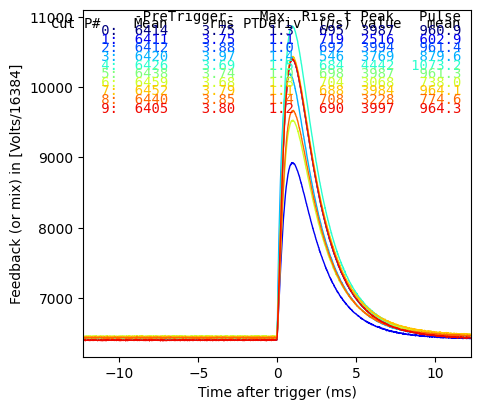

In [8]:
ch = 92
plt.figure(figsize=(5,4.5))
data.channel[ch].plot_traces(range(10))
#plt.xlim((-1,3))

(7300.0, 7700.0)

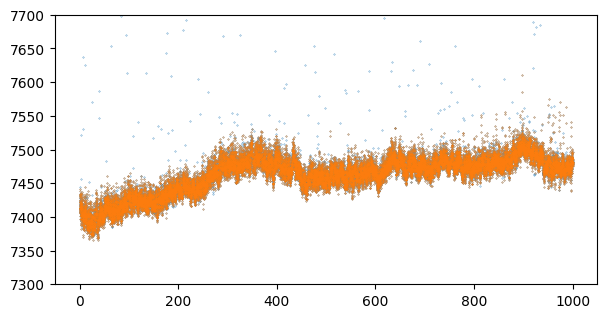

In [10]:

c = 103
dsc = data.channel[103]
gc = dsc.good()

plt.figure(figsize=(7,3.5))
plt.plot((dsc.p_timestamp[:] - dsc.p_timestamp[0])/60,dsc.p_pretrig_mean[:],'.',ms=0.5)
plt.plot((dsc.p_timestamp[gc] - dsc.p_timestamp[0])/60,dsc.p_pretrig_mean[gc],'.',ms=0.5)
plt.ylim((7300,7700))
#plt.plot([xoff+8.05e5,xoff+8.05e5],[0,2000])

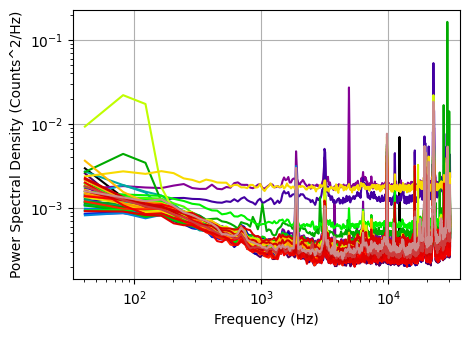

In [12]:
data.compute_noise(forceNew=True)

plt.figure(figsize=(5,3.5))
data.plot_noise(legend=False)


traceback:
['Traceback (most recent call last):\n', '  File "c:\\Users\\kmm6\\Documents\\pax_data\\.venv\\Lib\\site-packages\\mass\\core\\channel.py", line 535, in wrapper\n    method(ds, *args, **kwargs)\n    ~~~~~~^^^^^^^^^^^^^^^^^^^^^\n', '  File "c:\\Users\\kmm6\\Documents\\pax_data\\.venv\\Lib\\site-packages\\mass\\core\\channel.py", line 1044, in avg_pulses_auto_masks\n    raise ValueError("No good pulses")\n', 'ValueError: No good pulses\n']
traceback:
['Traceback (most recent call last):\n', '  File "c:\\Users\\kmm6\\Documents\\pax_data\\.venv\\Lib\\site-packages\\mass\\core\\channel.py", line 535, in wrapper\n    method(ds, *args, **kwargs)\n    ~~~~~~^^^^^^^^^^^^^^^^^^^^^\n', '  File "c:\\Users\\kmm6\\Documents\\pax_data\\.venv\\Lib\\site-packages\\mass\\core\\channel.py", line 1044, in avg_pulses_auto_masks\n    raise ValueError("No good pulses")\n', 'ValueError: No good pulses\n']


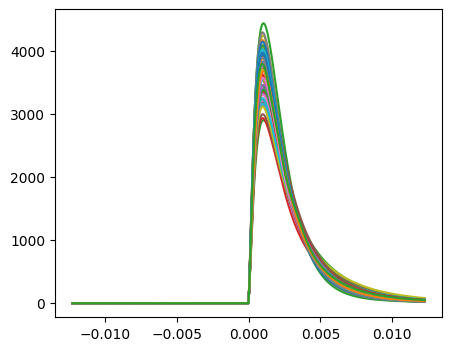

In [13]:
data.avg_pulses_auto_masks(forceNew=True)

plt.figure(figsize=(5,4))

dt = (np.arange(0,data.nSamples,1)[:]-data.nPresamples)*data.timebase
for ds in data:
    plt.plot(dt, ds.average_pulse[:], label='ljh '+str(ds.channum))

#plt.xlim((-0.5e-3,1.5e-3))
#plt.ylim((-500,7000))
#plt.legend()

KeyError: 110

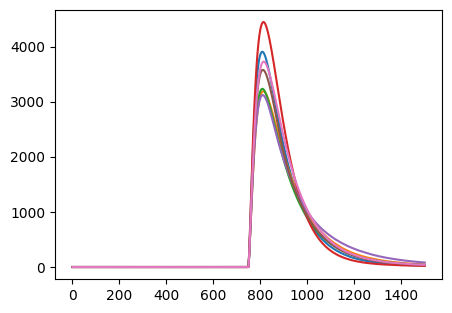

In [14]:
plotchan = [9, 17, 31, 63, 75, 88, 103, 110, ]
plt.figure(figsize=(5,3.5))
for ch in plotchan:
    plt.plot(data.channel[ch].average_pulse[:])

In [15]:

data.compute_5lag_filter(f_3db=20000,forceNew=True)
#data.summarize_filters(std_energy=80000.) #

In [16]:
data.filter_data(forceNew=True)
data.drift_correct(forceNew=True)

chan 102 best drift correction parameter: 13.645362e6
chan 103 best drift correction parameter: 13.604482e6
chan 105 best drift correction parameter: 11.495938e6
chan 106 best drift correction parameter: 8.244109e6
chan 107 best drift correction parameter: 15.332838e6
chan 17 best drift correction parameter: 13.109447e6
chan 2 best drift correction parameter: 11.854604e6
chan 20 best drift correction parameter: 7.389153e6
chan 21 best drift correction parameter: -0.106733e6
chan 22 best drift correction parameter: 13.823866e6
chan 23 best drift correction parameter: 13.791296e6
chan 24 best drift correction parameter: 13.140323e6
chan 3 best drift correction parameter: 9.314459e6
chan 30 best drift correction parameter: 36.465482e6
chan 31 best drift correction parameter: 10.079287e6
chan 33 best drift correction parameter: 10.436127e6
chan 34 best drift correction parameter: 14.092836e6
chan 35 best drift correction parameter: 8.632908e6
chan 36 best drift correction parameter: 19.358

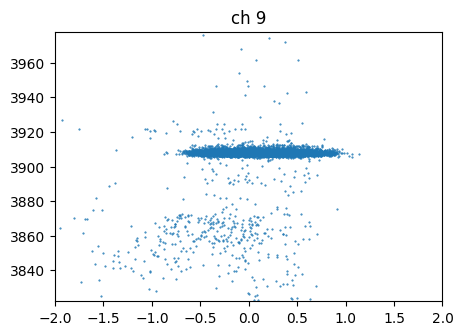

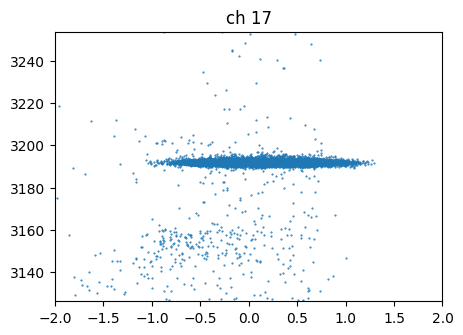

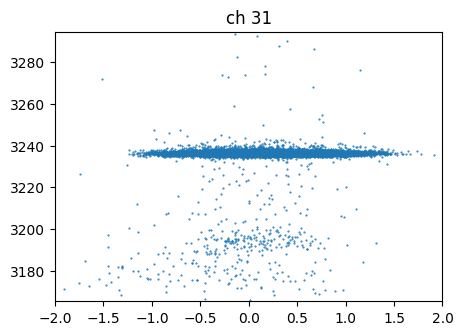

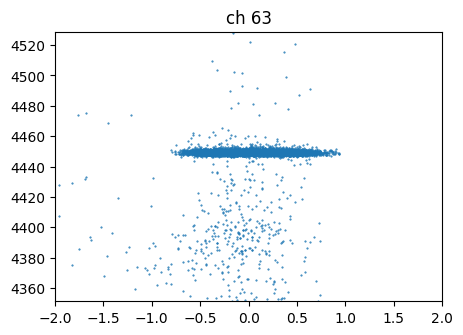

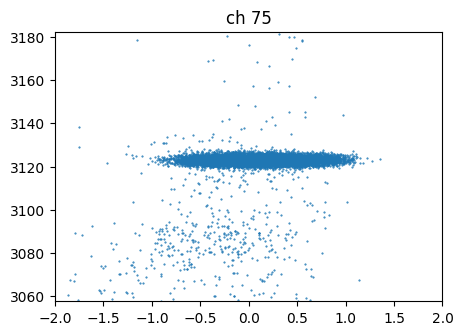

In [17]:
## test to see if we should be running phase_correct
for ch in plotchan[:5]:
    
    ds = data.channel[ch]
    g = ds.good()
    plt.figure(figsize=(5,3.5))
    c,b = np.histogram(ds.p_filt_value_dc[g],bins=1600,range=(0,16000))
    pk = b[np.argmax(c)]
    
    plt.plot(ds.p_filt_phase[g],ds.p_filt_value_dc[g],'.',ms=1)
    plt.xlim((-2,2))
    plt.ylim((pk*0.98,pk*1.02))
    plt.title('ch '+str(ds.channum))
    plt.show()
    
plt.close('all')

##### it looks variable over the full energy range, but for a given energy range
##### it looks pretty flat

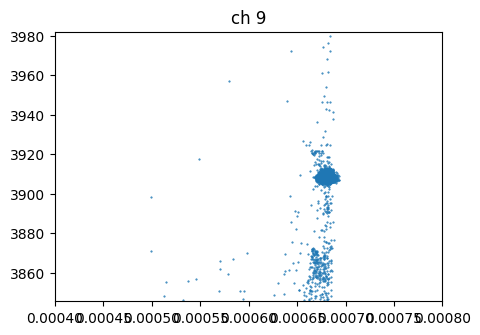

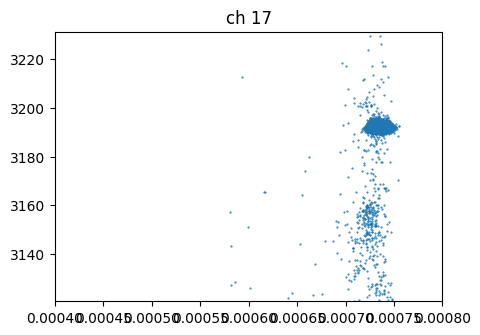

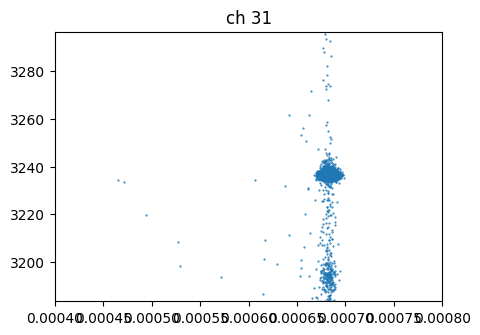

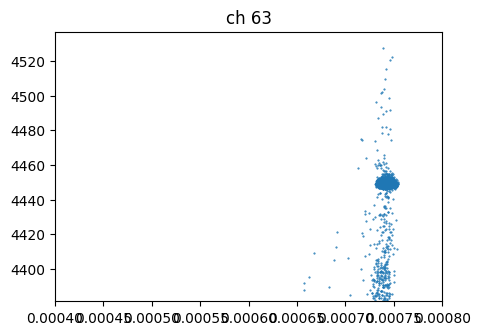

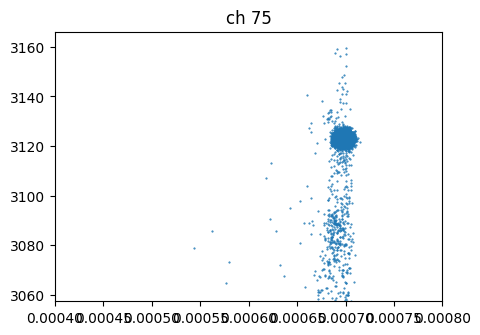

In [18]:
### rise time vs ph
for ch in plotchan[:5]:
    
    ds = data.channel[ch]
    g = ds.good()
    plt.figure(figsize=(5,3.5))
    #c,b = np.histogram(ds.p_rise_time[:],bins=500,range=(0.4e-3,1.1e-3))
    cg,bg = np.histogram(ds.p_filt_value_dc[g],bins=500,range=(0,16000))
    pk = bg[np.argmax(cg)]
    #plt.plot(b[:-1],c)
    #plt.plot(bg[:-1],cg)
    plt.plot(ds.p_rise_time[g],ds.p_filt_value_dc[g],'.',ms=1)
    #plt.xlim((-2,2))
    plt.ylim((pk*0.985,pk*1.02))
    plt.xlim((0.4e-3,0.8e-3))
    plt.title('ch '+str(ds.channum))
    plt.show()
    
plt.close('all')

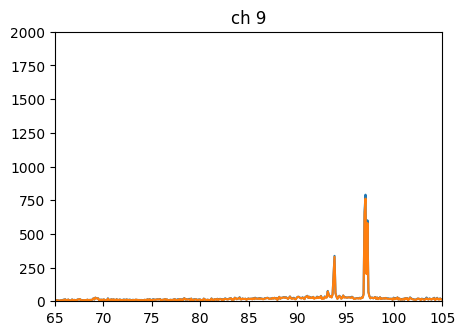

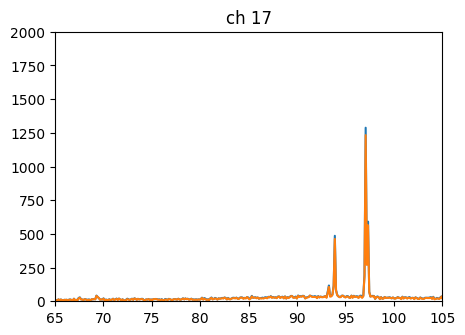

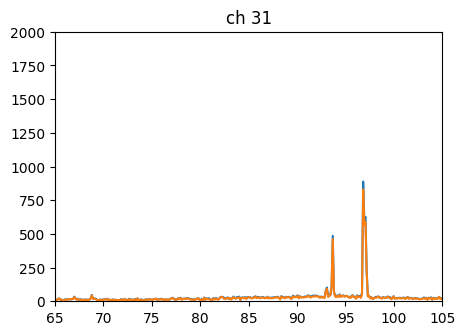

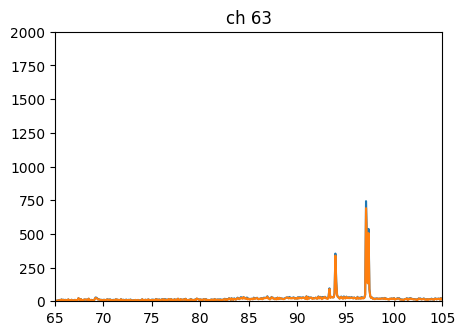

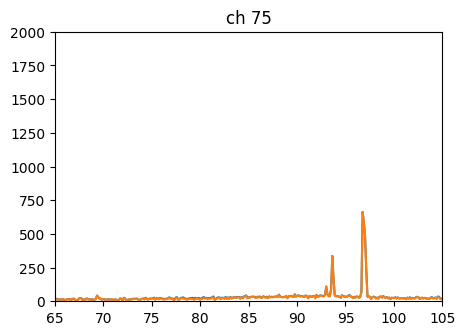

In [41]:
### plot some pulse height histograms

c057 = 122.060 ## make a fake linear calibration

for ch in plotchan[:5]:
    
    ds = data.channel[ch]
    g = ds.good()
    plt.figure(figsize=(5,3.5))
    c,b = np.histogram(ds.p_filt_value_dc[:],bins=5000,range=(0,16000))
    cg,bg = np.histogram(ds.p_filt_value_dc[g],bins=5000,range=(0,16000))
    pk = bg[np.argmax(cg)]
    plt.plot(b[:-1]*122.060/pk,c)
    plt.plot(bg[:-1]*122.060/pk,cg)

    plt.title('ch '+str(ds.channum))
    plt.xlim((65,105))
    plt.ylim((0,2000))
    plt.show()
    
plt.close('all')

In [ ]:
n=0
goodcal = []
nobachans = [] # only fit eu lines
bachans = [] # gotta fit 'em all
for i,ds in enumerate(data):
    g = ds.good()
    print('Working on channel %d'%ds.channum)
    
    try:
        lines = [93.574e3, 97.016e3, 122.06065e3, 136.47356e3]
        #lines = ['AlKAlpha','ClKL2']
        ds.calibrate('p_filt_value_dc',line_names=lines,forceNew=True)
        #plt.figure(figsize=(6,4))
        #ds.calibration['p_filt_value_dc'].plot()
        goodcal.append(ds.channum)
        plt.show()
    except:
        print('failed to calibrate ch '+str(ds.channum)) 

            
plt.close('all')

Calibrating chan 102 to create p_filt_value_dc
c:\Users\kmm6\Documents\pax_data\.venv\Lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")
Calibrating chan 103 to create p_filt_value_dc


Working on channel 102
Working on channel 103


Calibrating chan 105 to create p_filt_value_dc
Calibrating chan 106 to create p_filt_value_dc


Working on channel 105
Working on channel 106


Calibrating chan 107 to create p_filt_value_dc
Calibrating chan 17 to create p_filt_value_dc


Working on channel 107
Working on channel 17


Calibrating chan 2 to create p_filt_value_dc
Calibrating chan 20 to create p_filt_value_dc


Working on channel 2
Working on channel 20


Calibrating chan 21 to create p_filt_value_dc
Calibrating chan 22 to create p_filt_value_dc


Working on channel 21
Working on channel 22


Calibrating chan 23 to create p_filt_value_dc
Calibrating chan 24 to create p_filt_value_dc


Working on channel 23
Working on channel 24


Calibrating chan 3 to create p_filt_value_dc
Calibrating chan 30 to create p_filt_value_dc


Working on channel 3
Working on channel 30


Calibrating chan 31 to create p_filt_value_dc
Calibrating chan 33 to create p_filt_value_dc


Working on channel 31
Working on channel 33


Calibrating chan 34 to create p_filt_value_dc
Calibrating chan 35 to create p_filt_value_dc


Working on channel 34
Working on channel 35


Calibrating chan 36 to create p_filt_value_dc
Calibrating chan 37 to create p_filt_value_dc


Working on channel 36
Working on channel 37


Calibrating chan 45 to create p_filt_value_dc
Calibrating chan 46 to create p_filt_value_dc


Working on channel 45
Working on channel 46


Calibrating chan 48 to create p_filt_value_dc
Calibrating chan 49 to create p_filt_value_dc


Working on channel 48
Working on channel 49


Calibrating chan 5 to create p_filt_value_dc
Calibrating chan 50 to create p_filt_value_dc


Working on channel 5
Working on channel 50


Calibrating chan 51 to create p_filt_value_dc
Calibrating chan 52 to create p_filt_value_dc


Working on channel 51
Working on channel 52


Calibrating chan 53 to create p_filt_value_dc
Calibrating chan 59 to create p_filt_value_dc


Working on channel 53
Working on channel 59


Calibrating chan 60 to create p_filt_value_dc
Calibrating chan 62 to create p_filt_value_dc


Working on channel 60
Working on channel 62


Calibrating chan 63 to create p_filt_value_dc
Calibrating chan 64 to create p_filt_value_dc


Working on channel 63
Working on channel 64


Calibrating chan 65 to create p_filt_value_dc
Calibrating chan 66 to create p_filt_value_dc


Working on channel 65
Working on channel 66


Calibrating chan 7 to create p_filt_value_dc
Calibrating chan 74 to create p_filt_value_dc


Working on channel 7
Working on channel 74


Calibrating chan 75 to create p_filt_value_dc
Calibrating chan 77 to create p_filt_value_dc


Working on channel 75
Working on channel 77


Calibrating chan 78 to create p_filt_value_dc
Calibrating chan 79 to create p_filt_value_dc


Working on channel 78
Working on channel 79


Calibrating chan 80 to create p_filt_value_dc
Calibrating chan 81 to create p_filt_value_dc


Working on channel 80
Working on channel 81


Calibrating chan 82 to create p_filt_value_dc
Calibrating chan 87 to create p_filt_value_dc


Working on channel 82
Working on channel 87


Calibrating chan 88 to create p_filt_value_dc
Calibrating chan 9 to create p_filt_value_dc


Working on channel 88
Working on channel 9


Calibrating chan 90 to create p_filt_value_dc
Calibrating chan 91 to create p_filt_value_dc


Working on channel 90
Working on channel 91


Calibrating chan 92 to create p_filt_value_dc
Calibrating chan 93 to create p_filt_value_dc


Working on channel 92
Working on channel 93


Calibrating chan 94 to create p_filt_value_dc


Working on channel 94


In [45]:
print(len(goodcal), len(data.good_channels))


53 53


fit channel 102


c:\Users\kmm6\Documents\pax_data\.venv\Lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


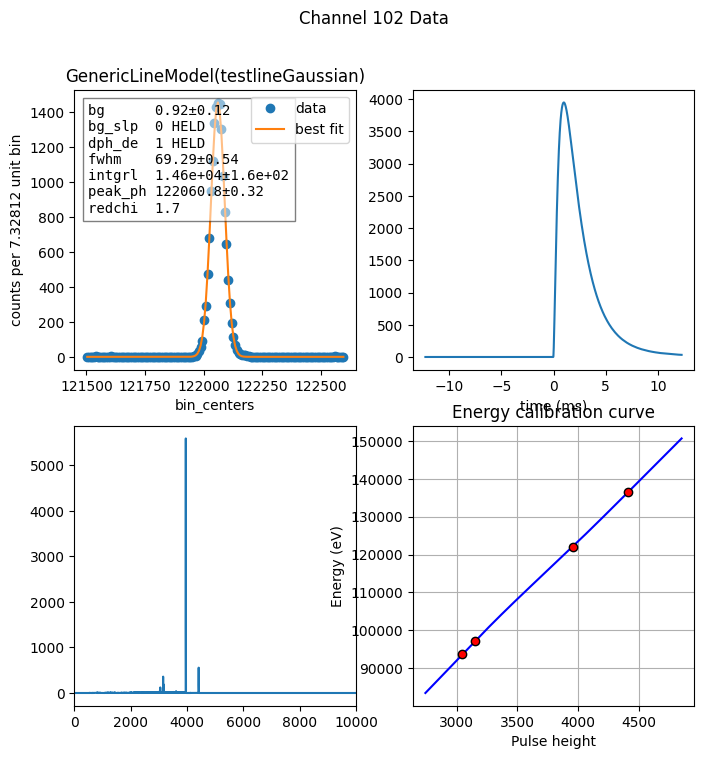

fit channel 103


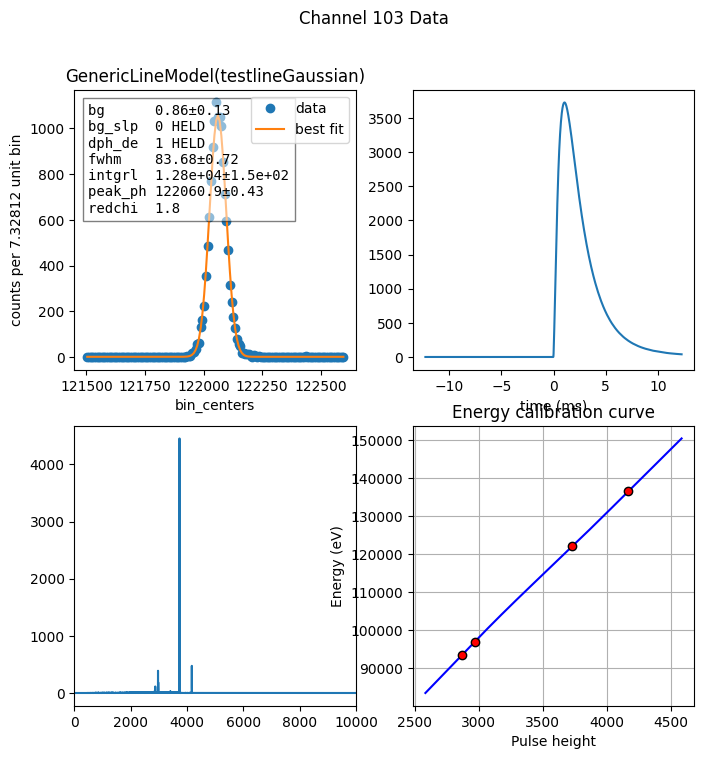

fit channel 105


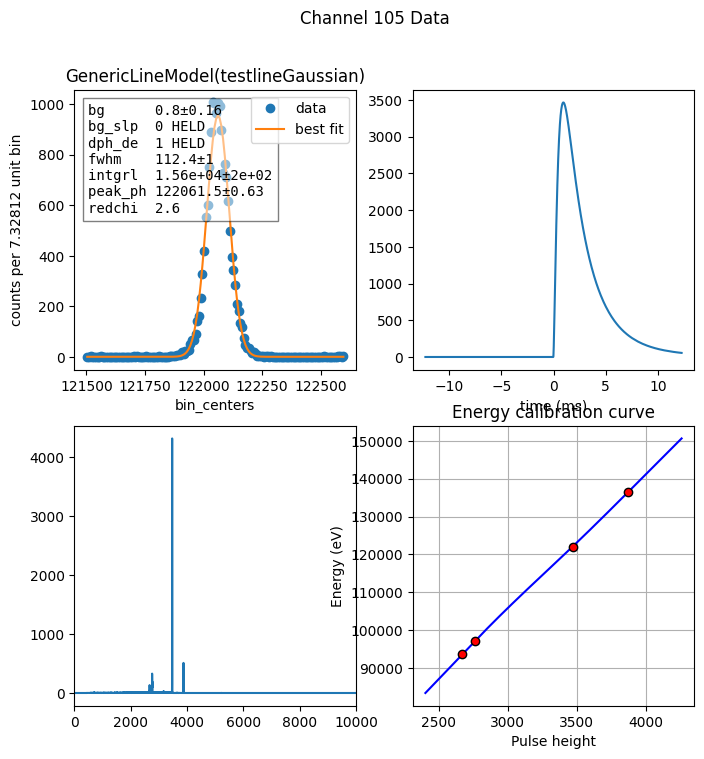

fit channel 106


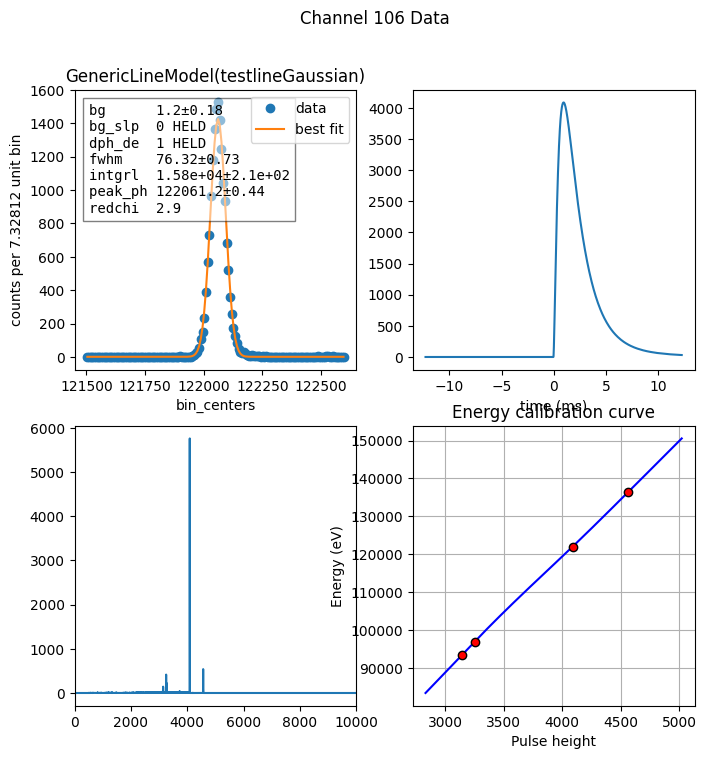

fit channel 107


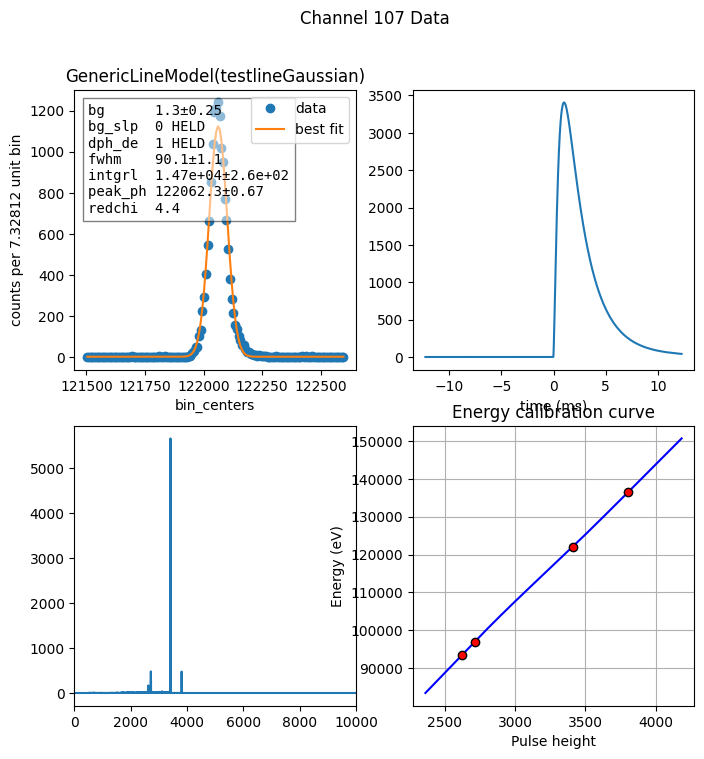

fit channel 17


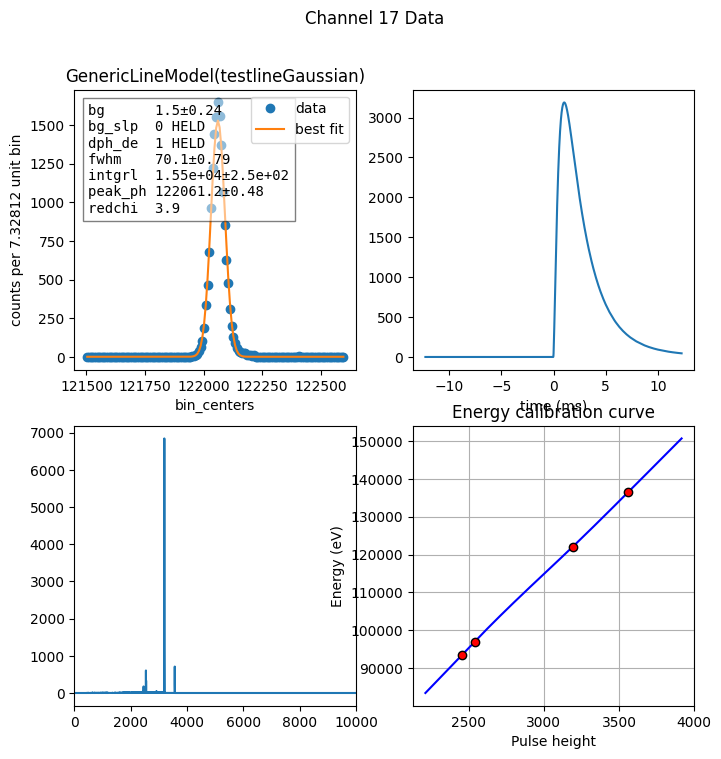

fit channel 2


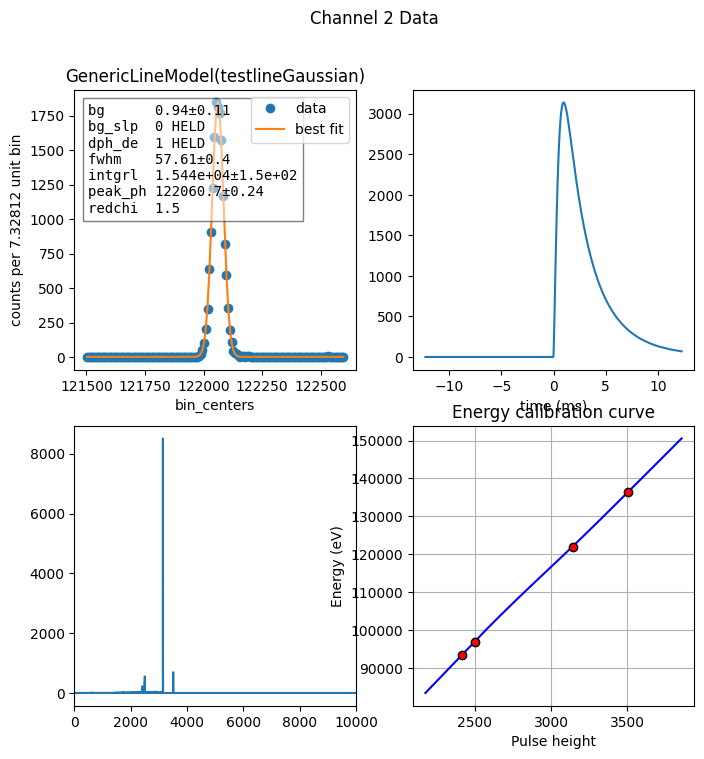

fit channel 20


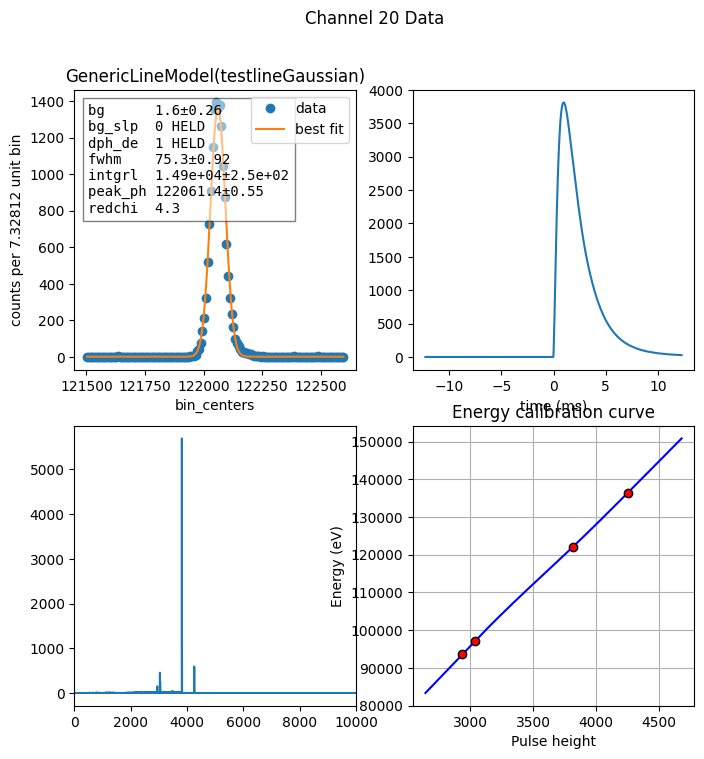

fit channel 21


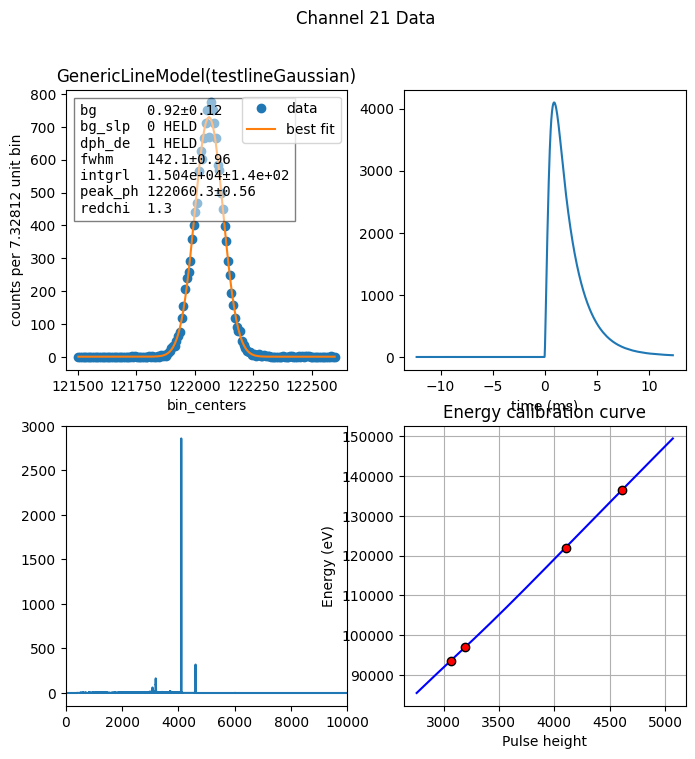

fit channel 22


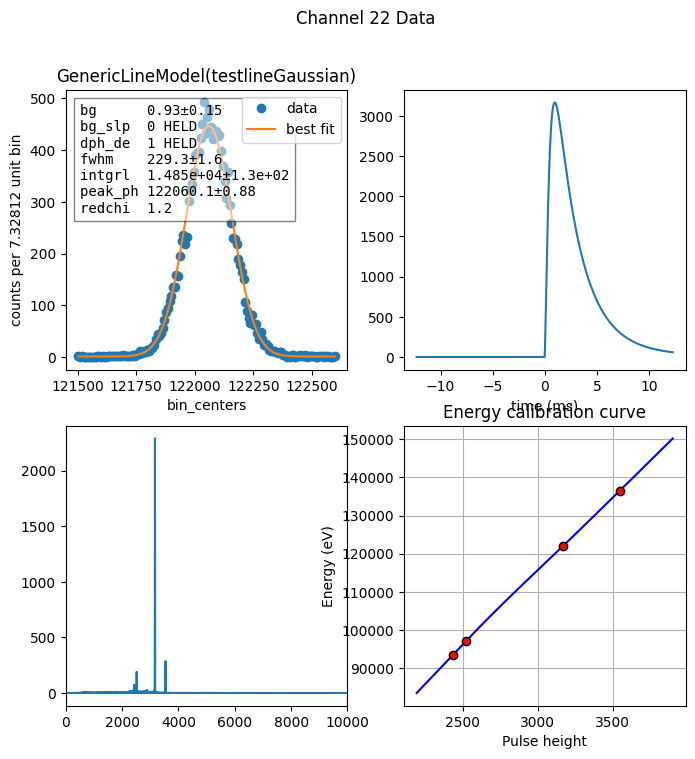

fit channel 23


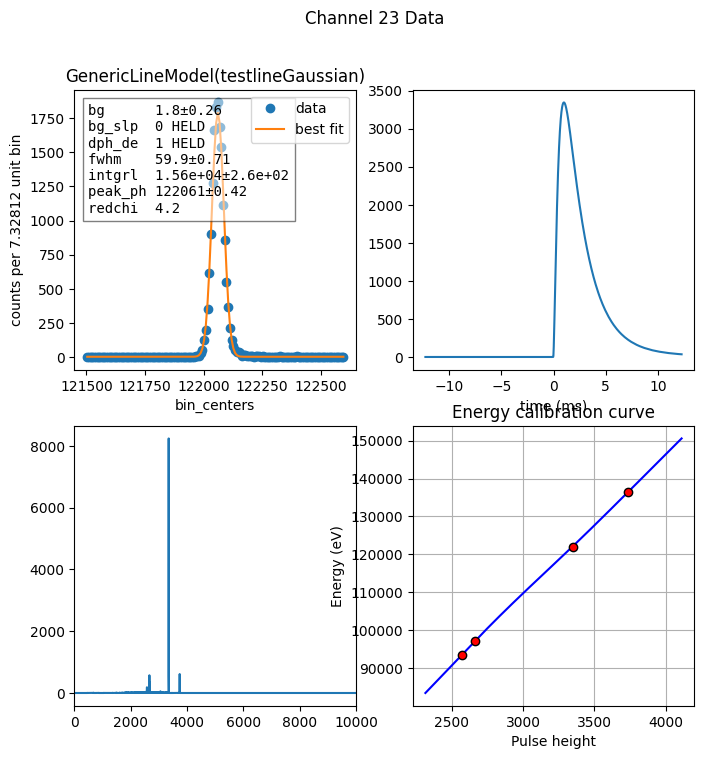

fit channel 24


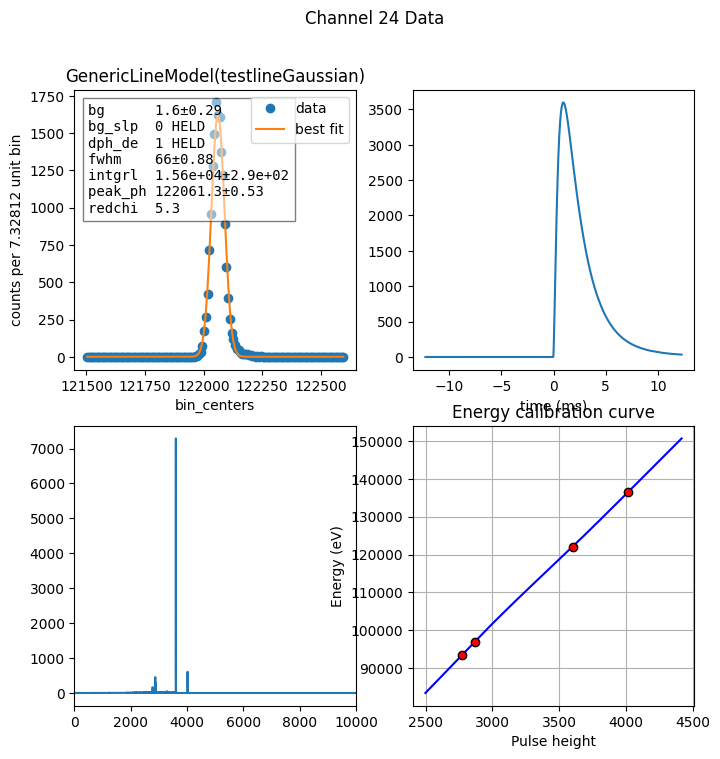

fit channel 3


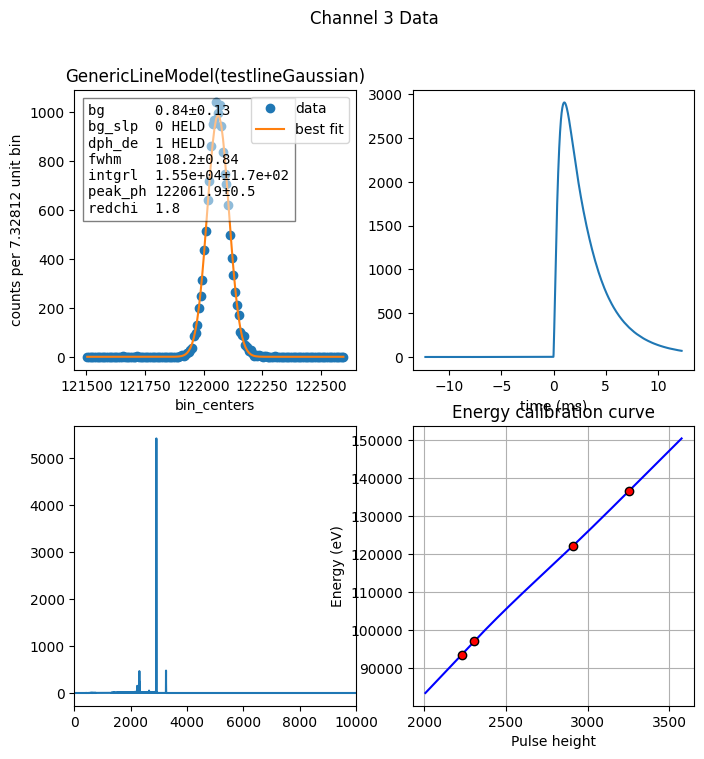

fit channel 30


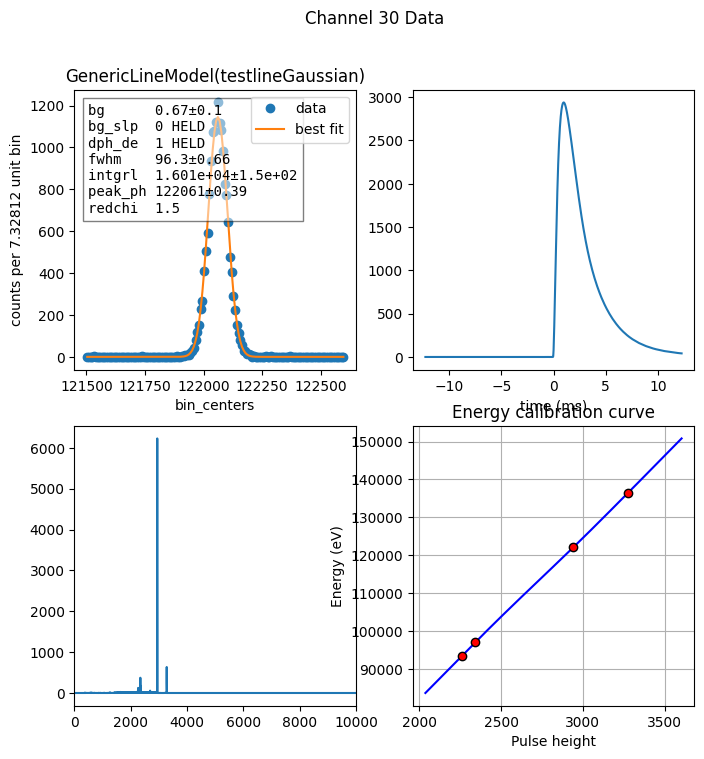

fit channel 31


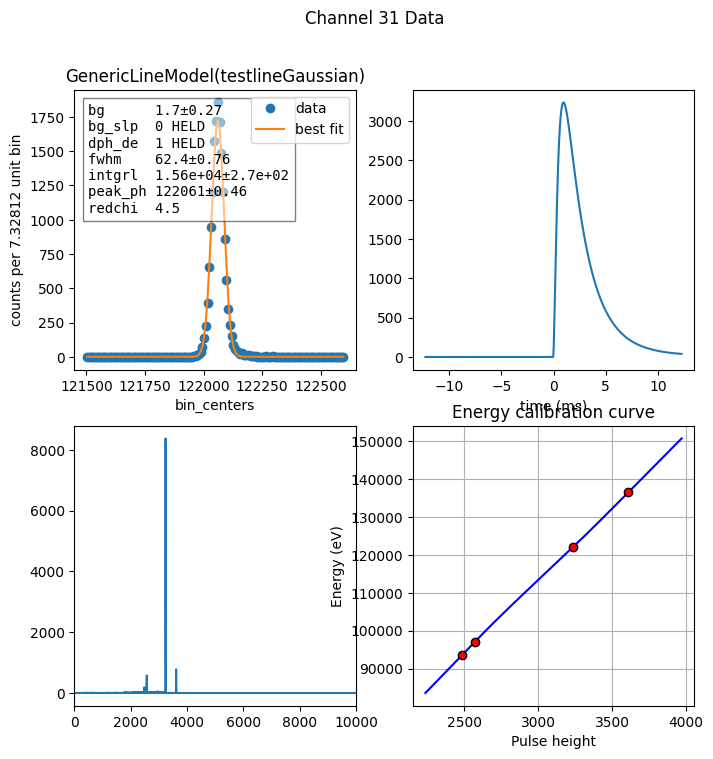

fit channel 33


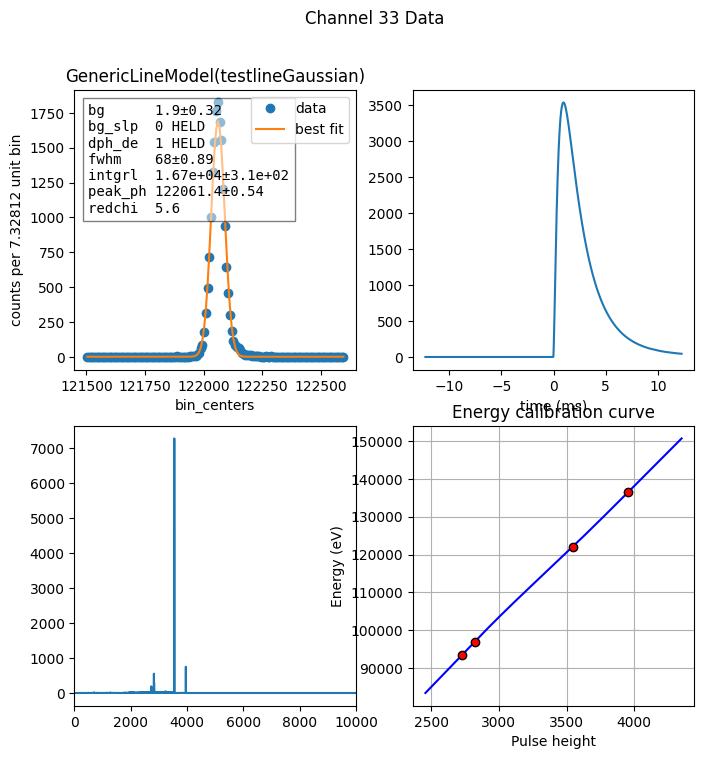

fit channel 34


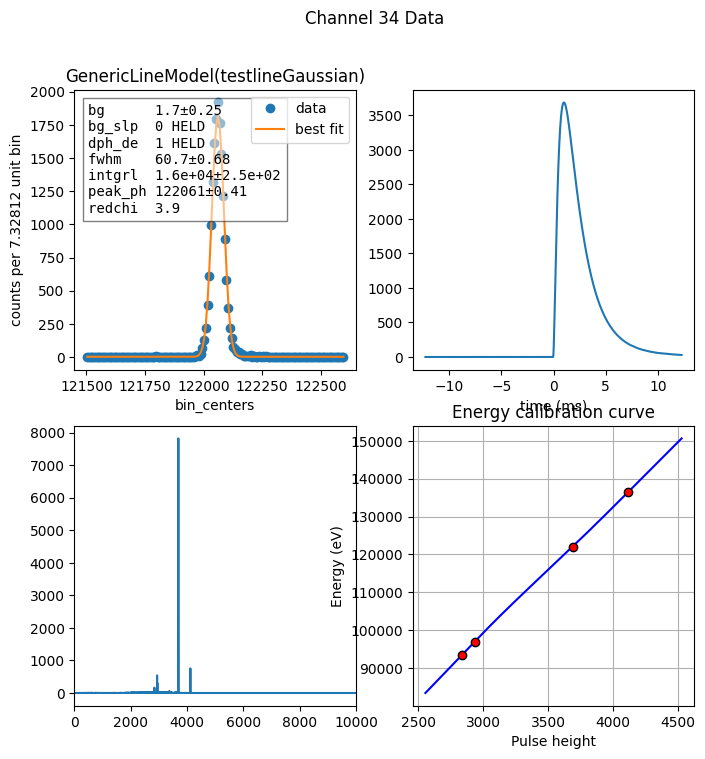

fit channel 35


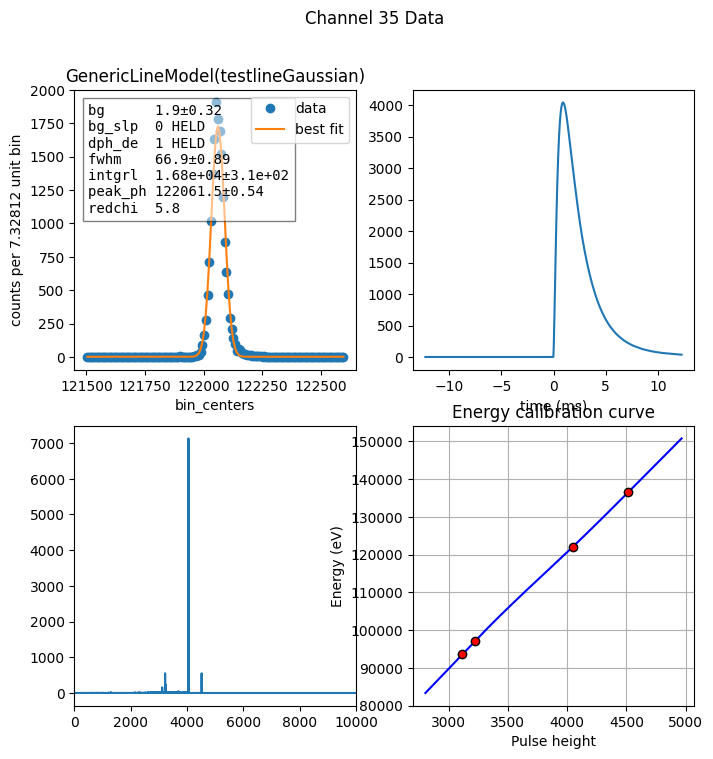

fit channel 36


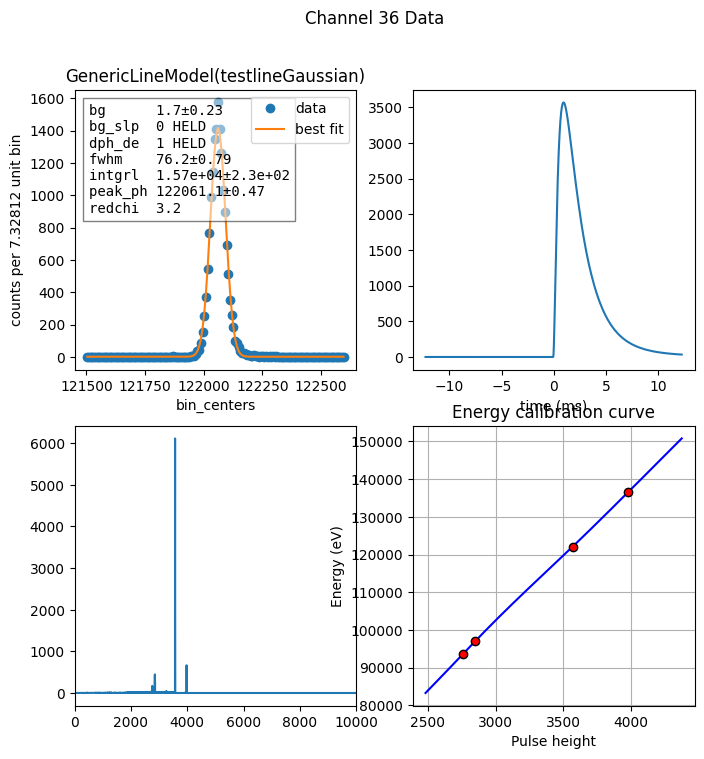

fit channel 37


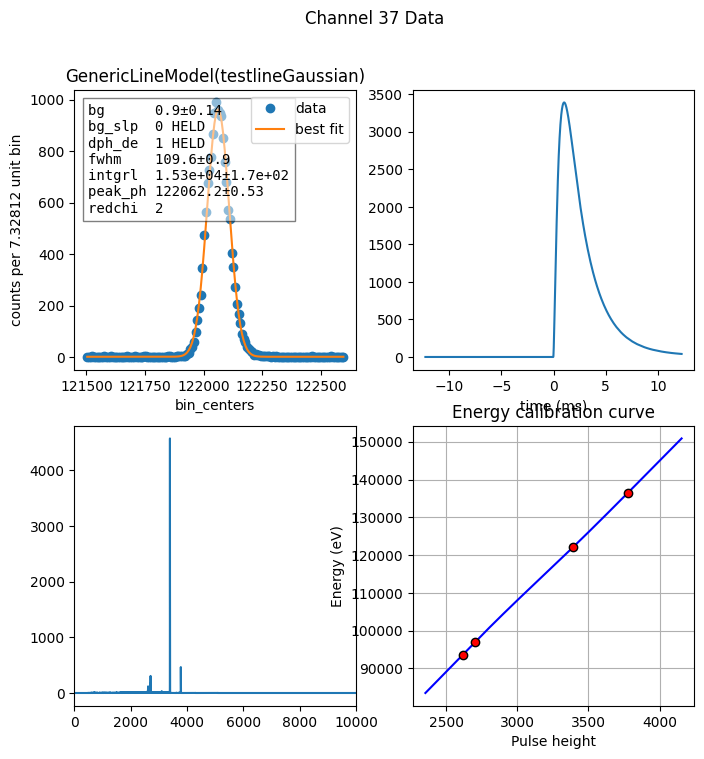

fit channel 45


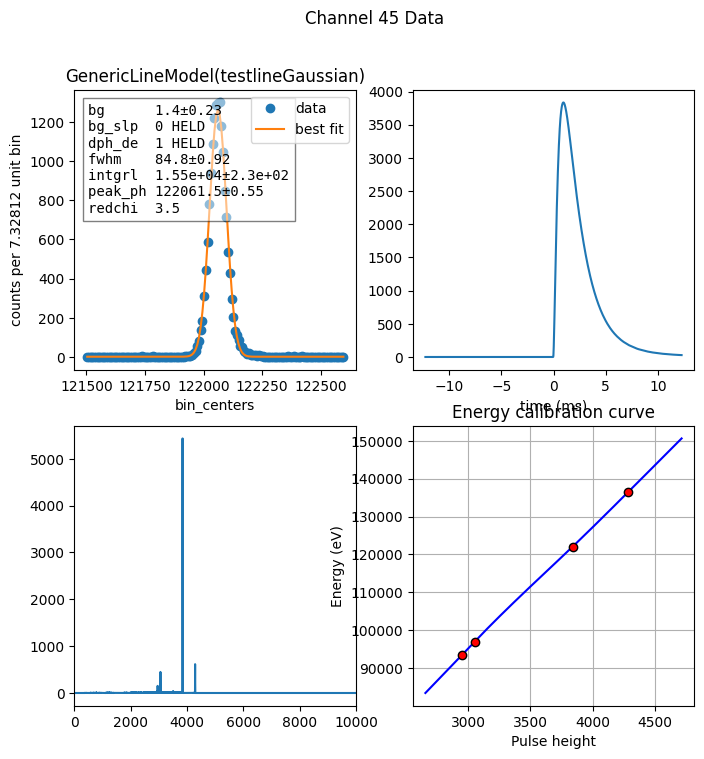

fit channel 46


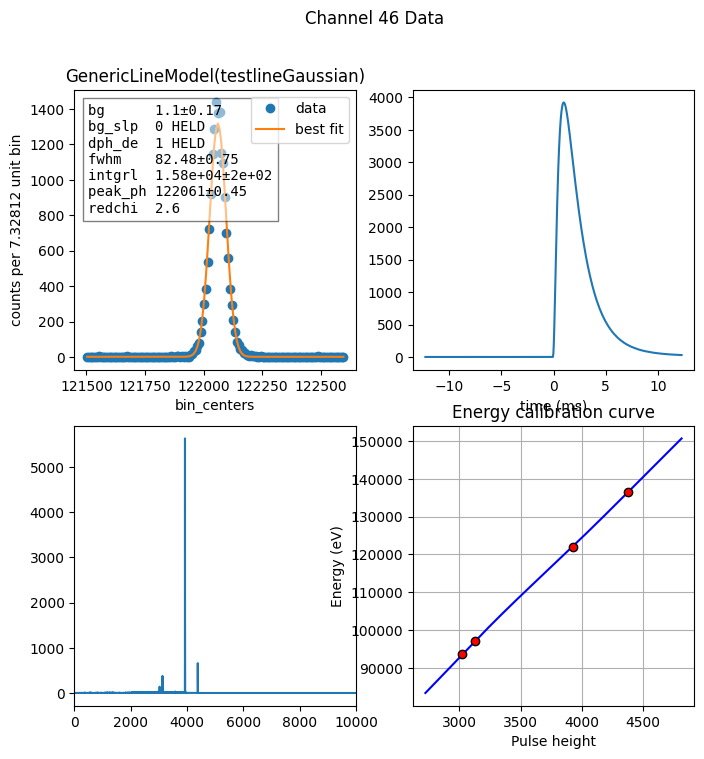

fit channel 48


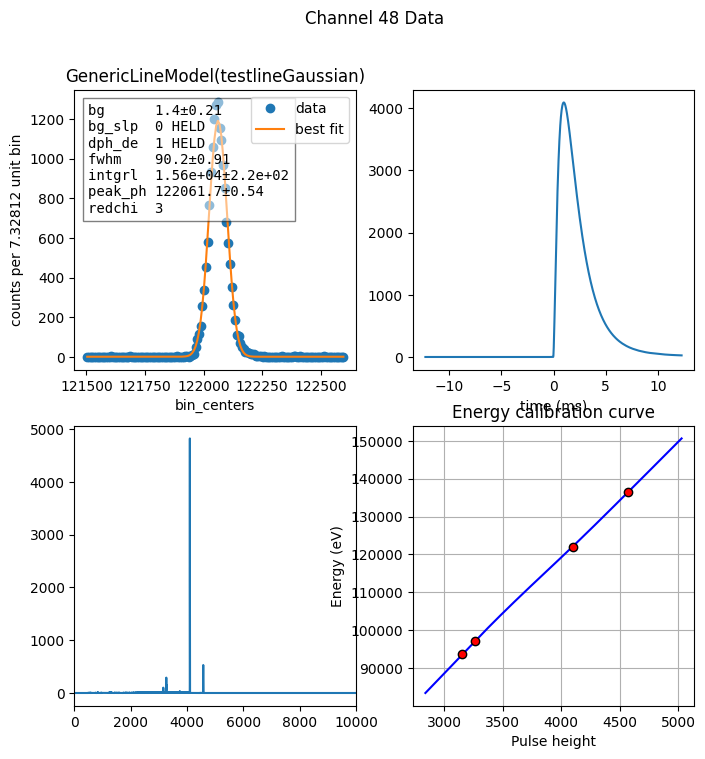

fit channel 49


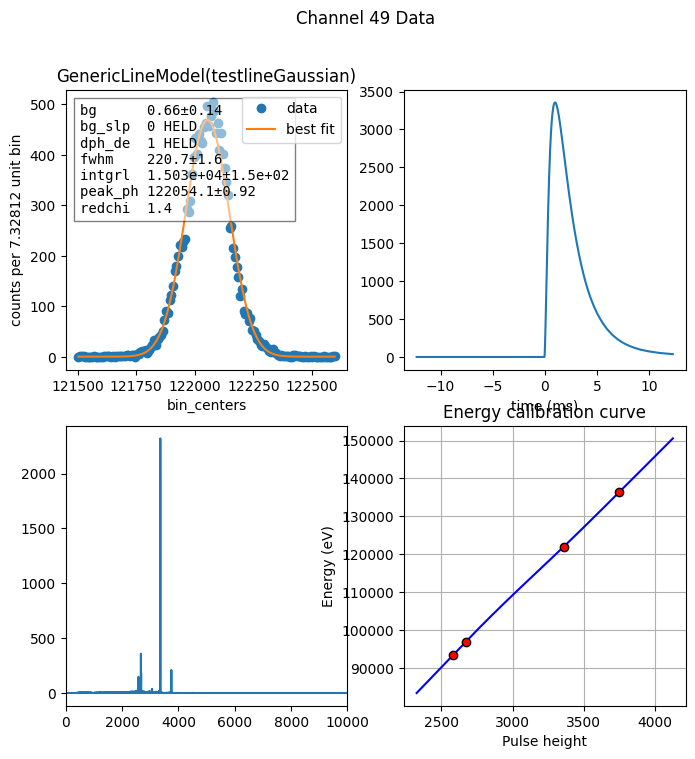

fit channel 5


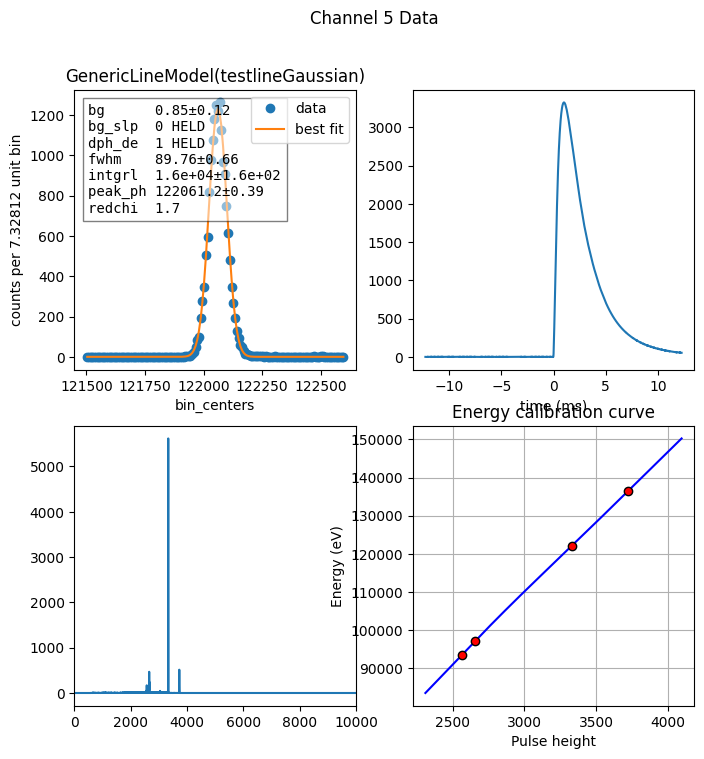

fit channel 50


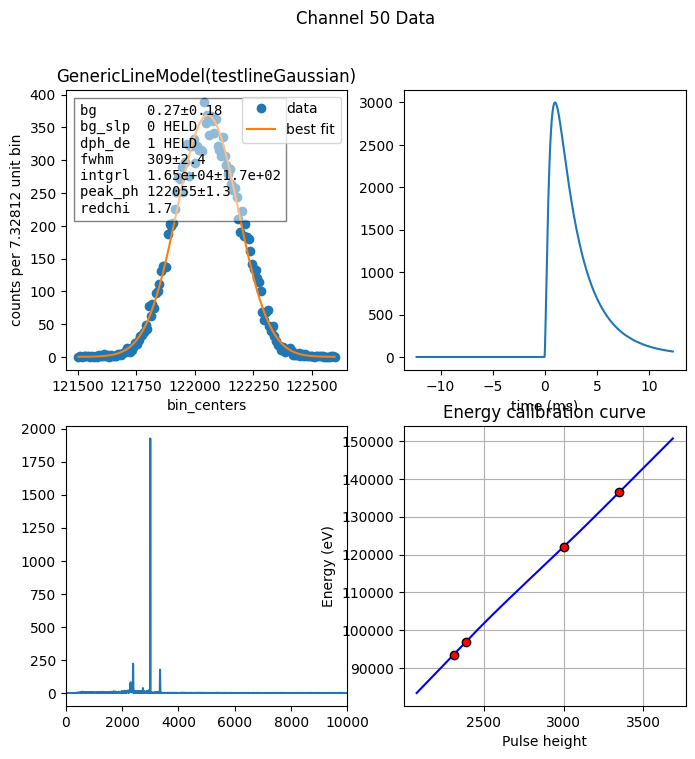

fit channel 51


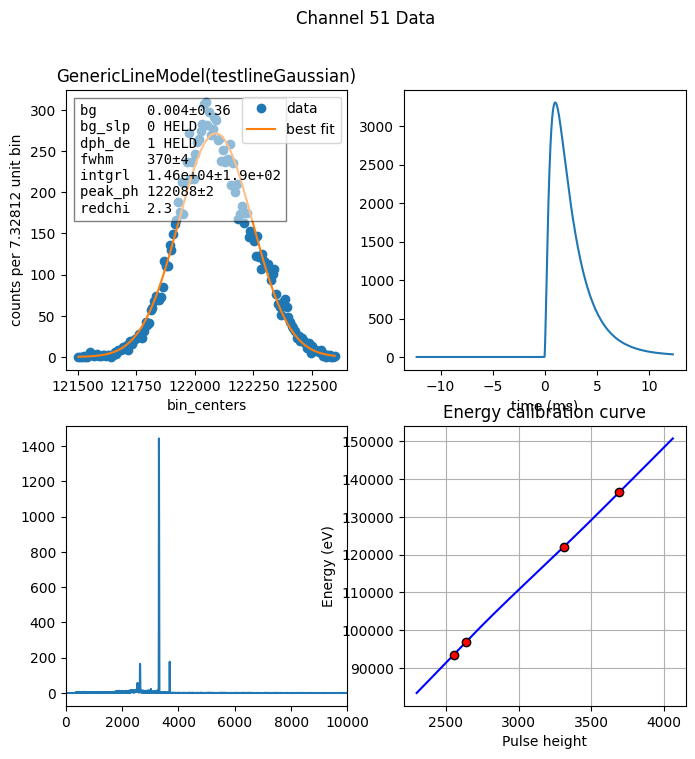

fit channel 52


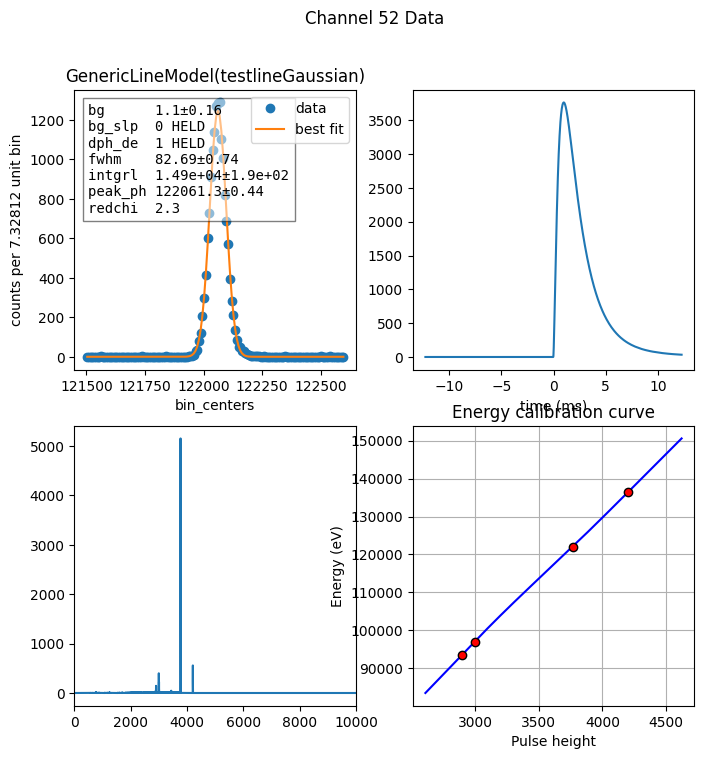

fit channel 53


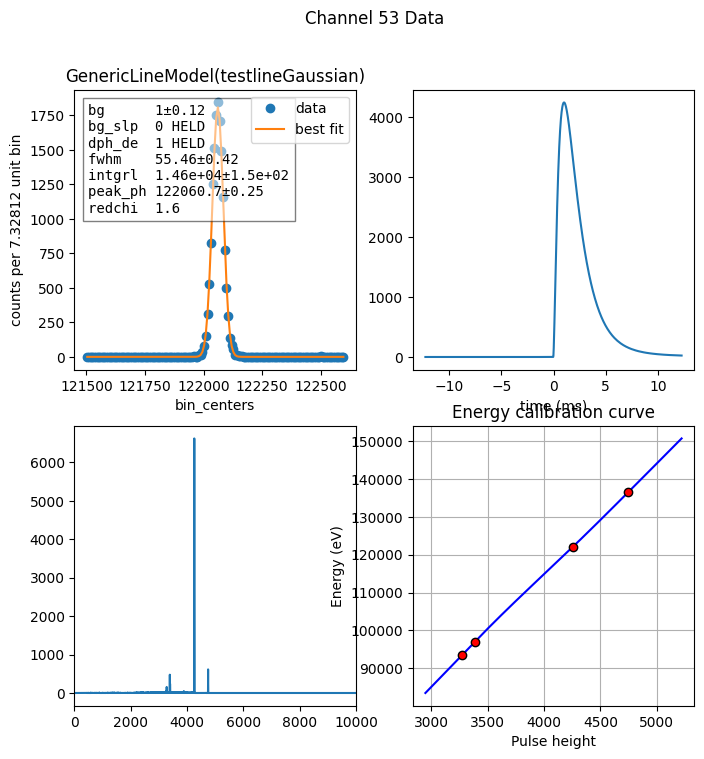

fit channel 59


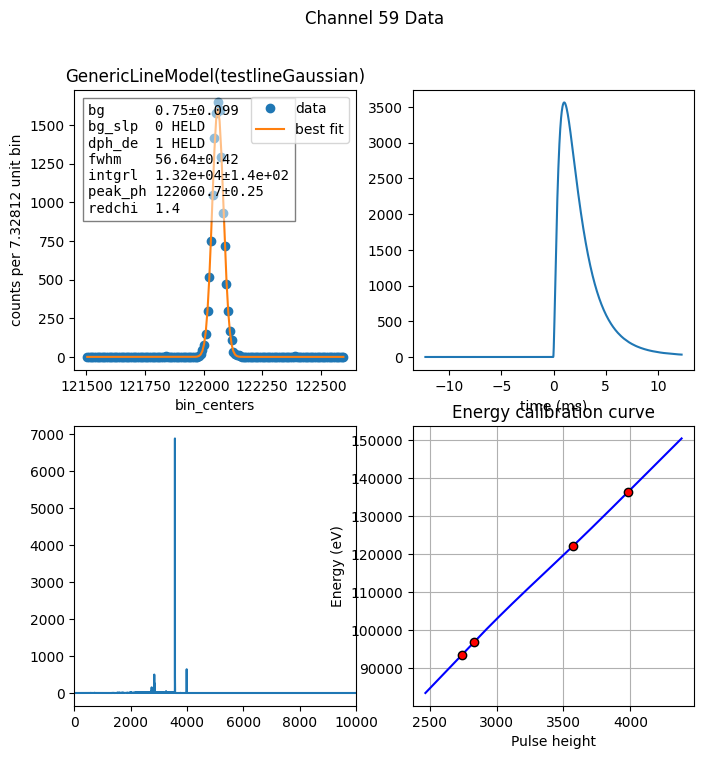

fit channel 60


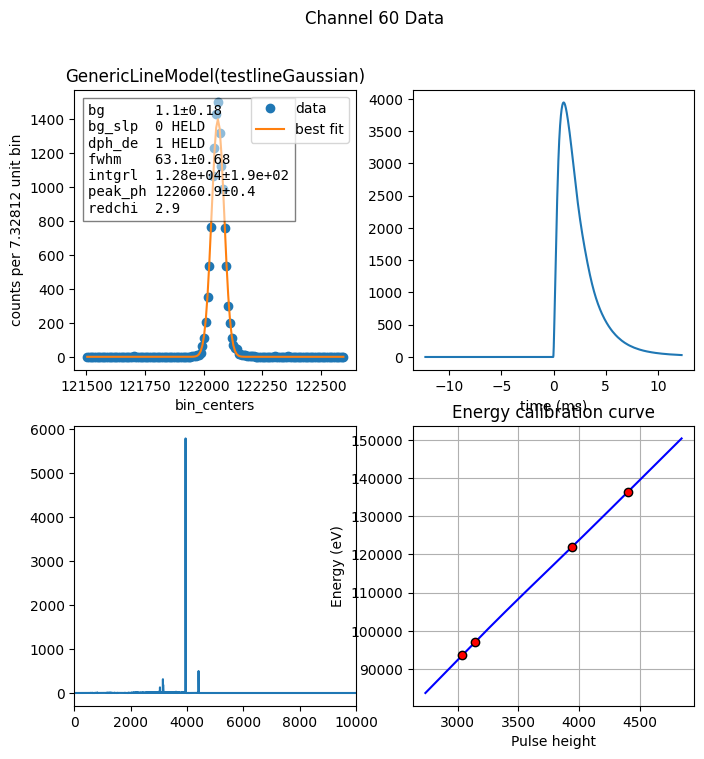

fit channel 62


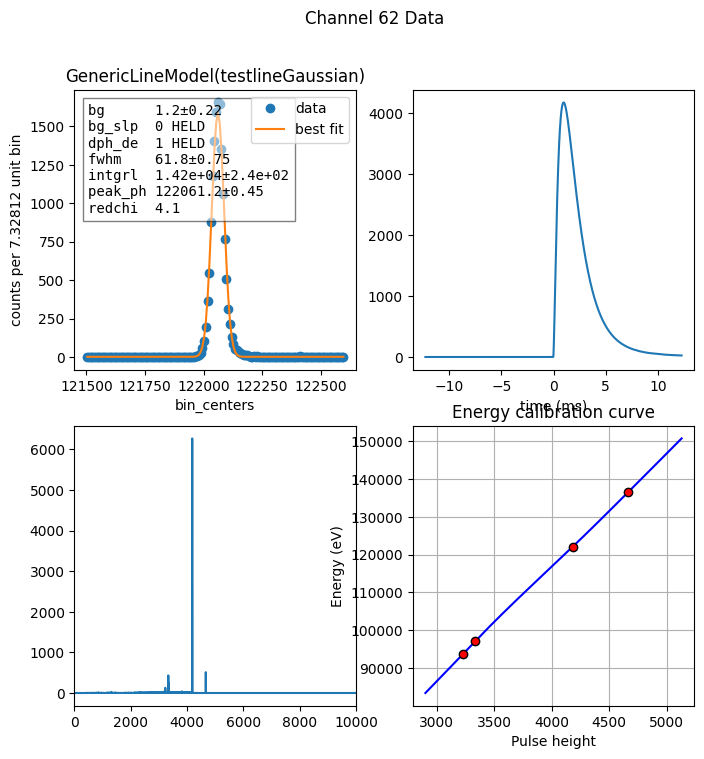

fit channel 63


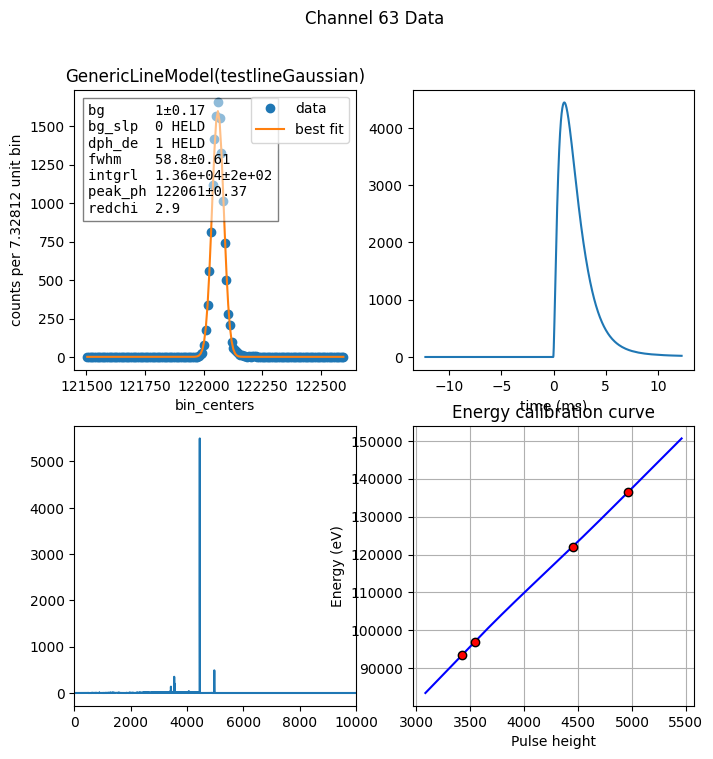

fit channel 64


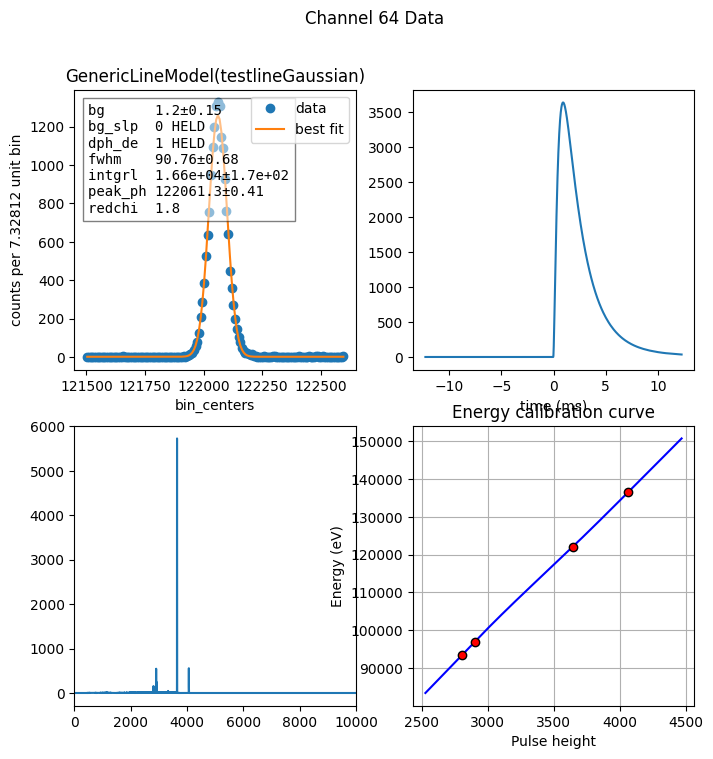

fit channel 65


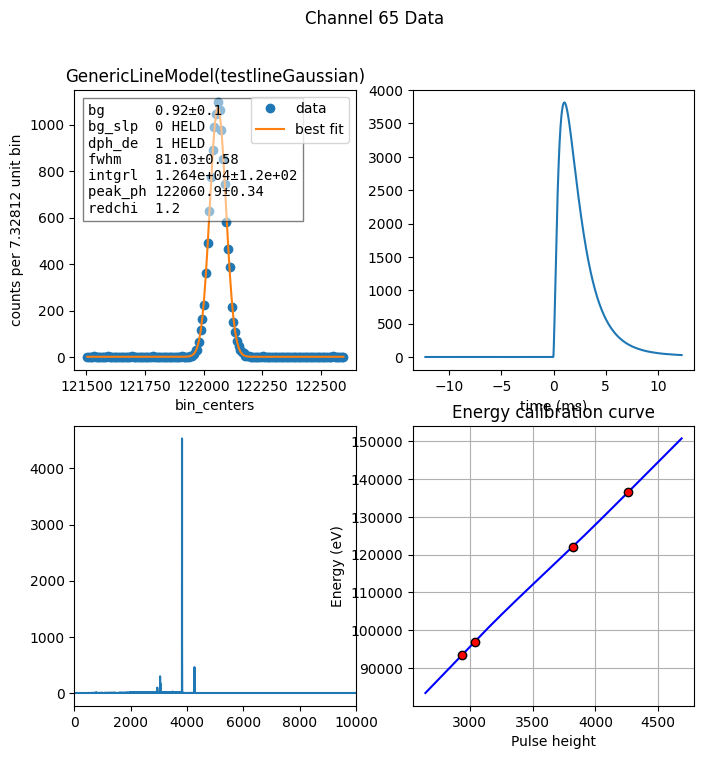

fit channel 66


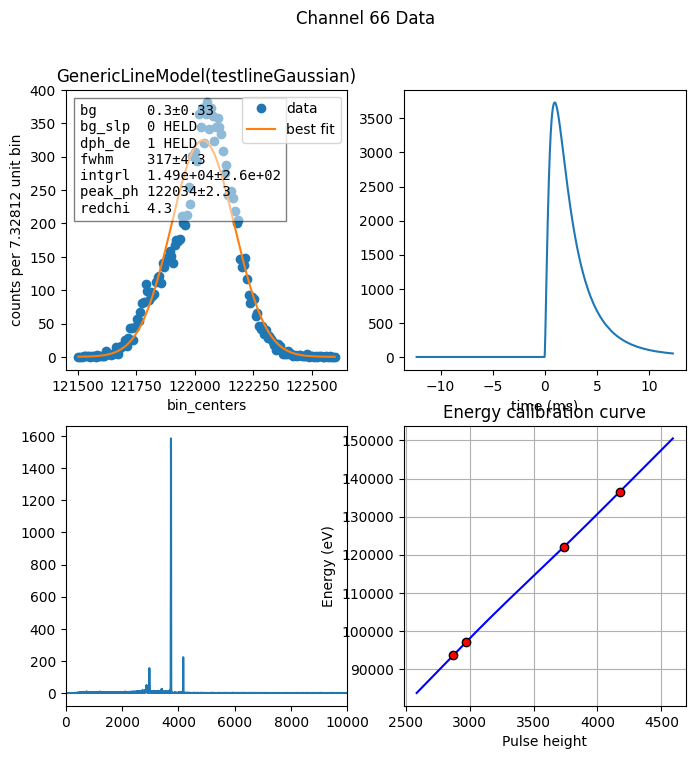

fit channel 7


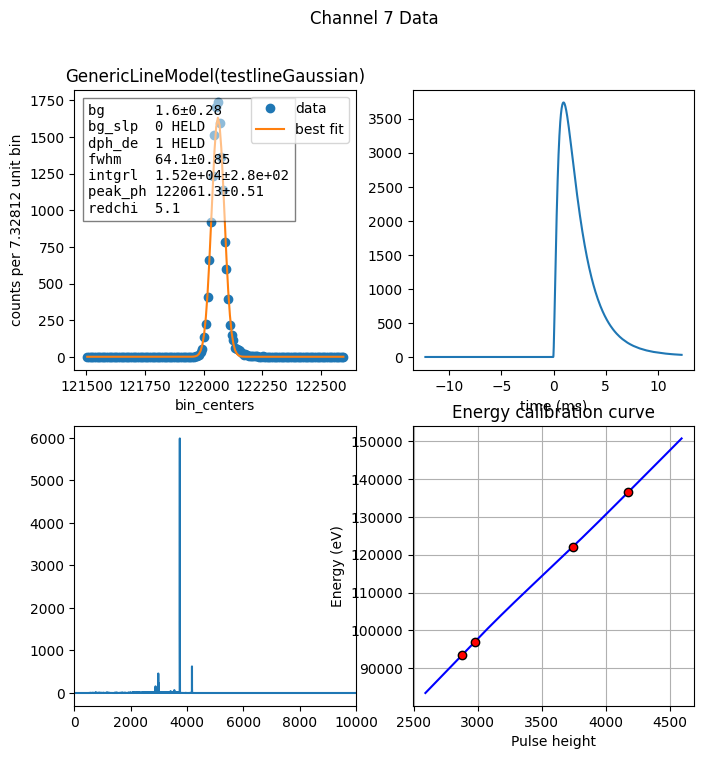

fit channel 74


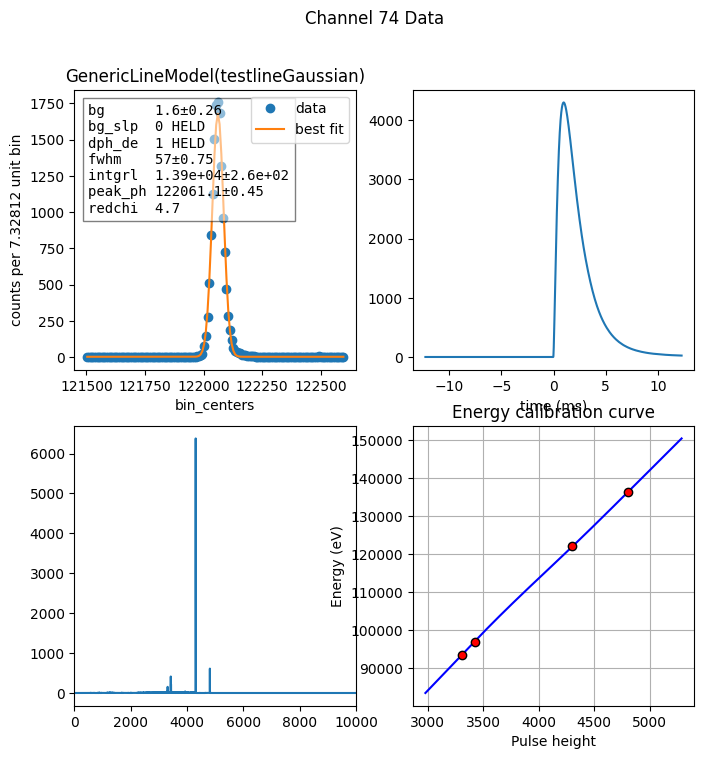

fit channel 75


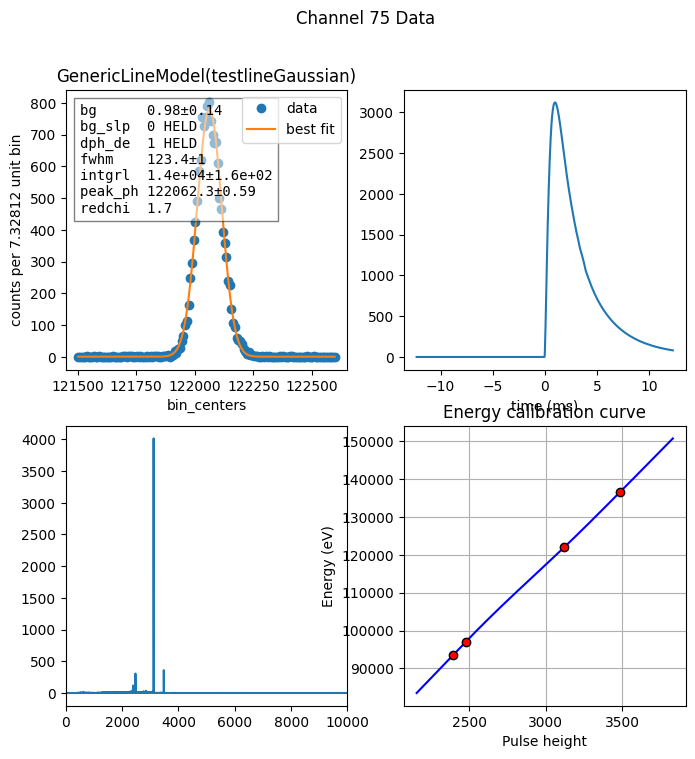

fit channel 77


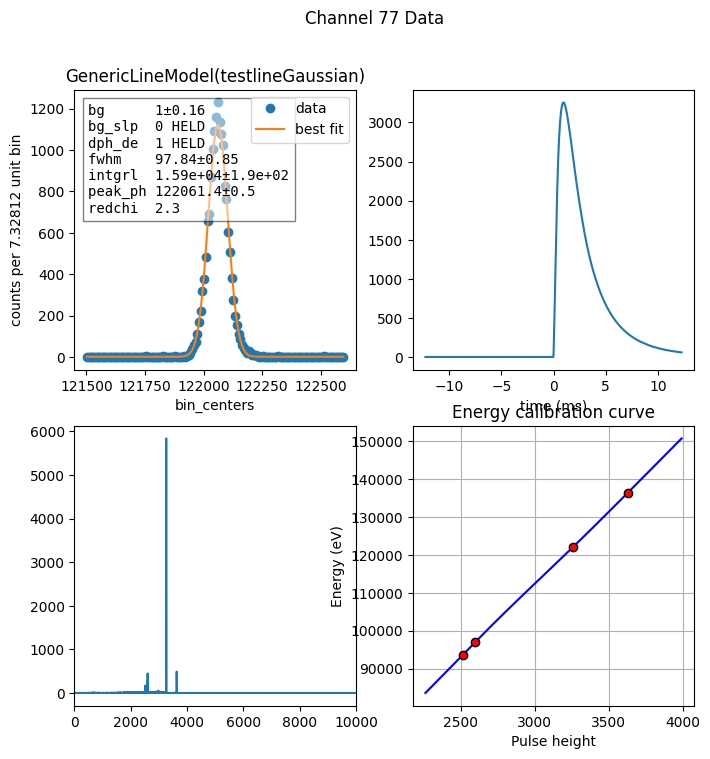

fit channel 78


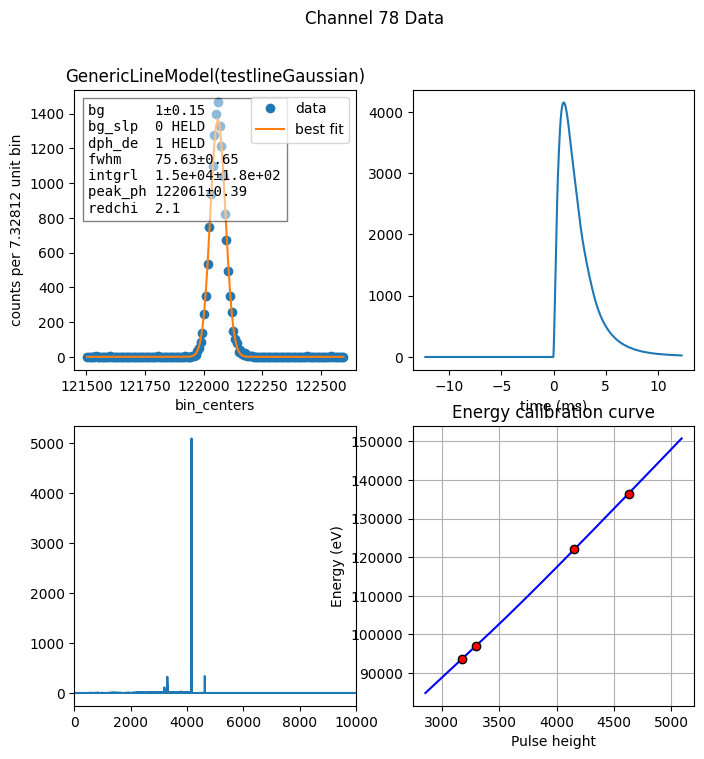

fit channel 79


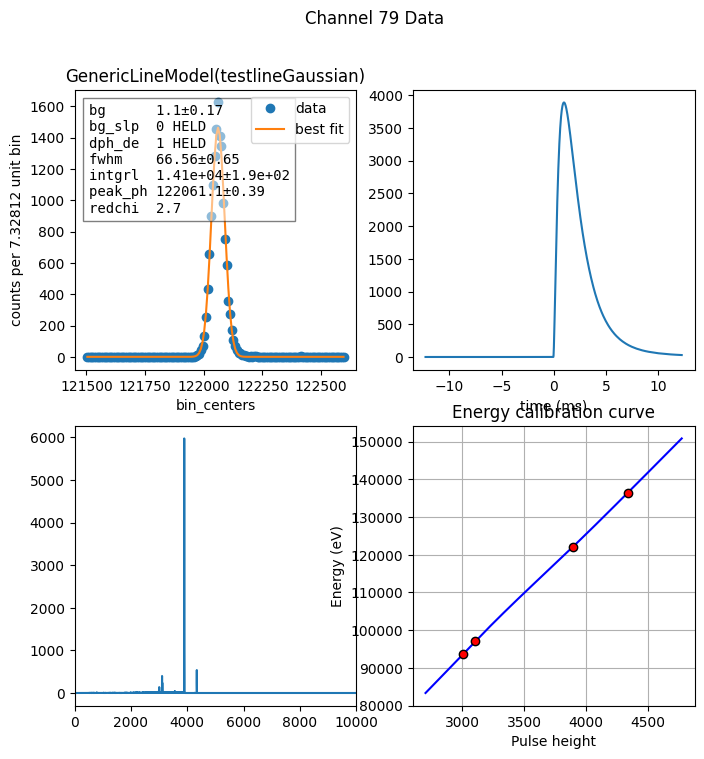

fit channel 80


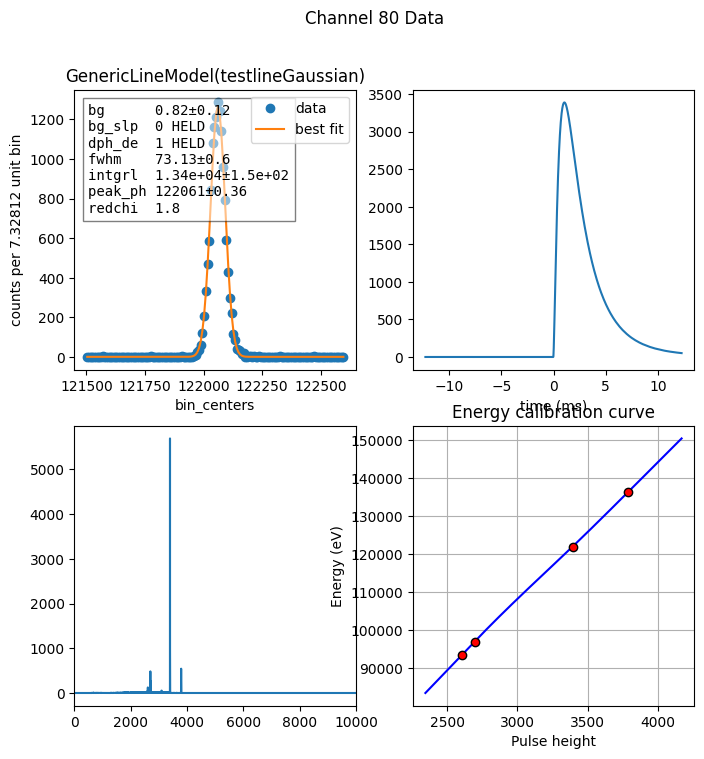

fit channel 81


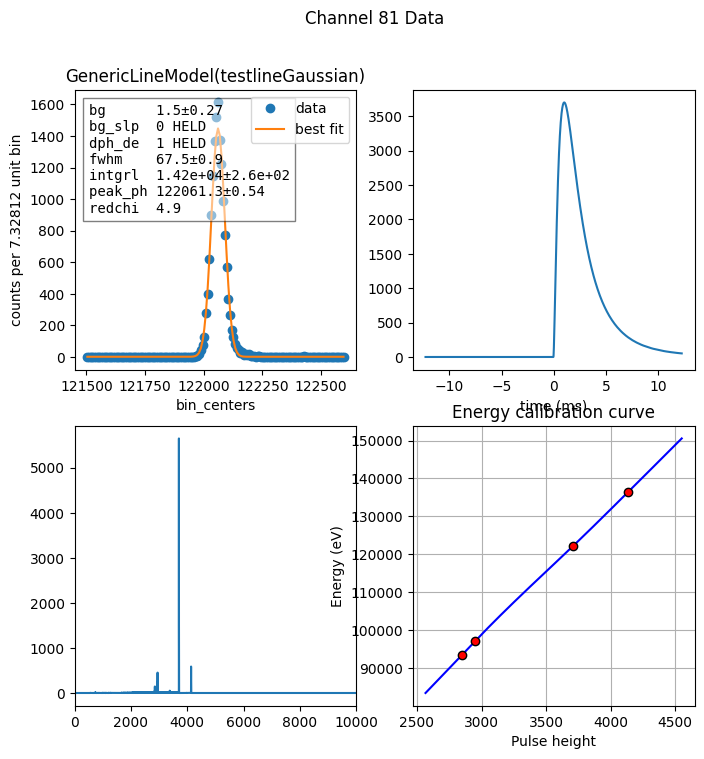

fit channel 82


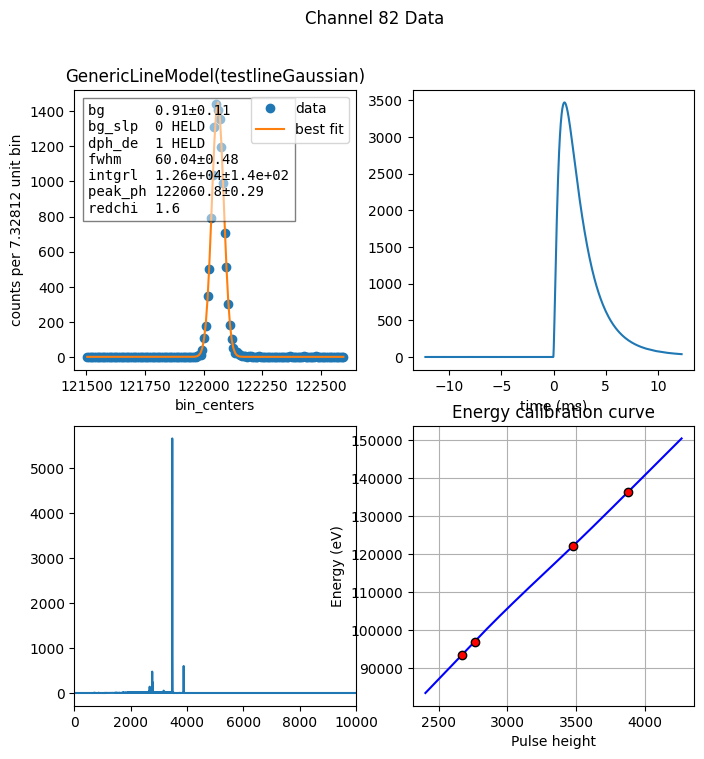

fit channel 87


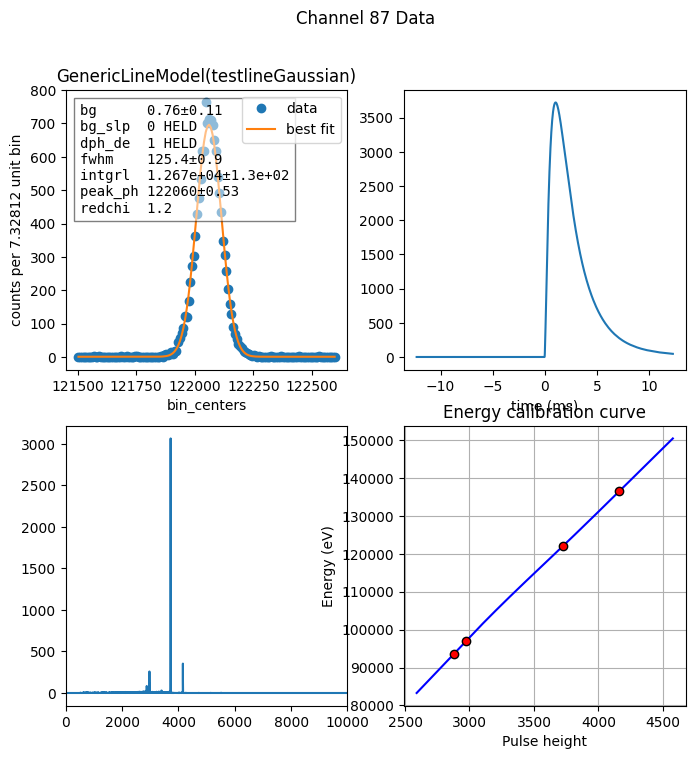

fit channel 88


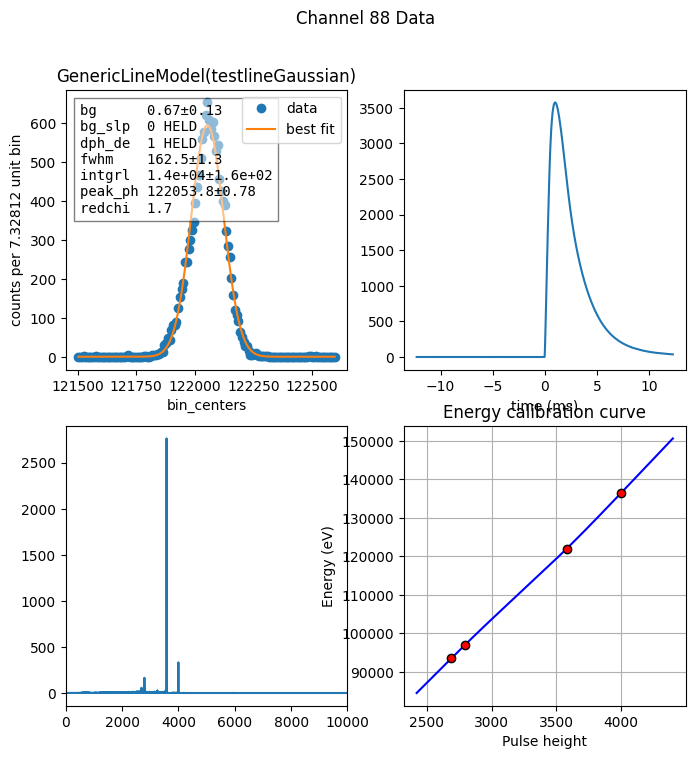

fit channel 9


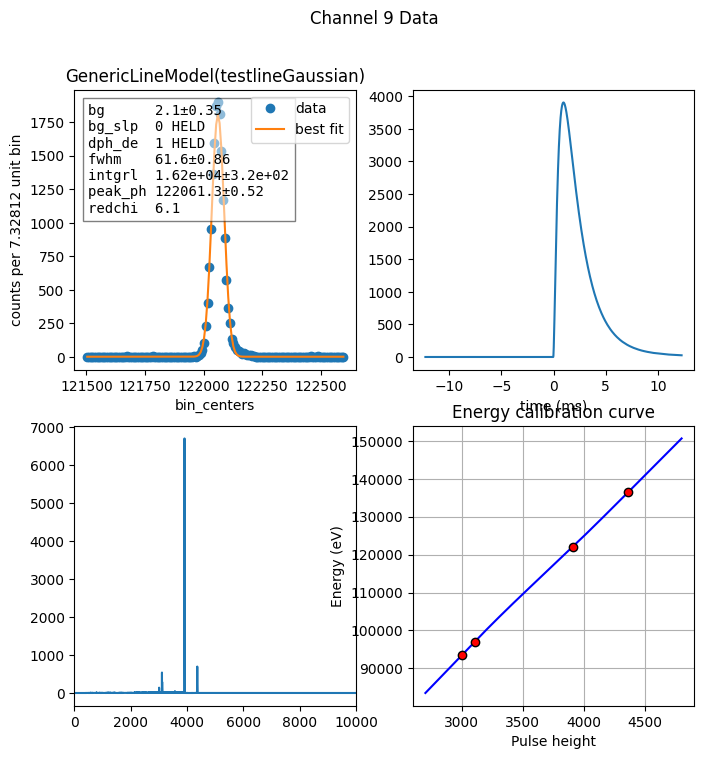

fit channel 90


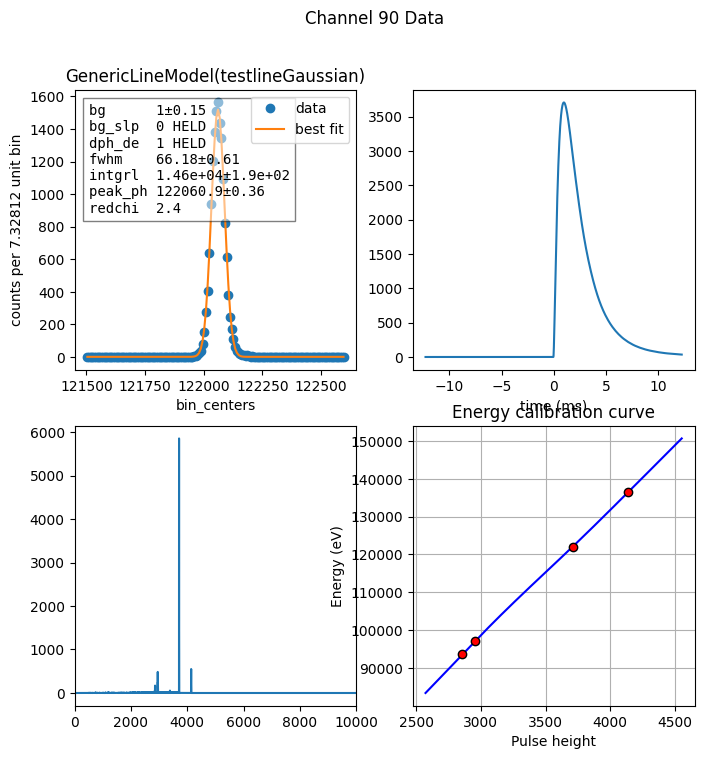

fit channel 91


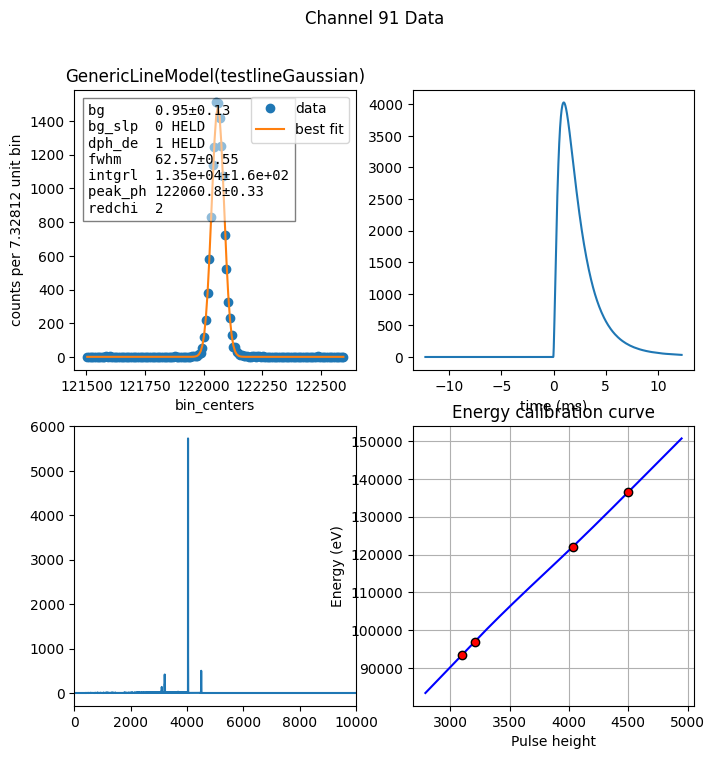

fit channel 92


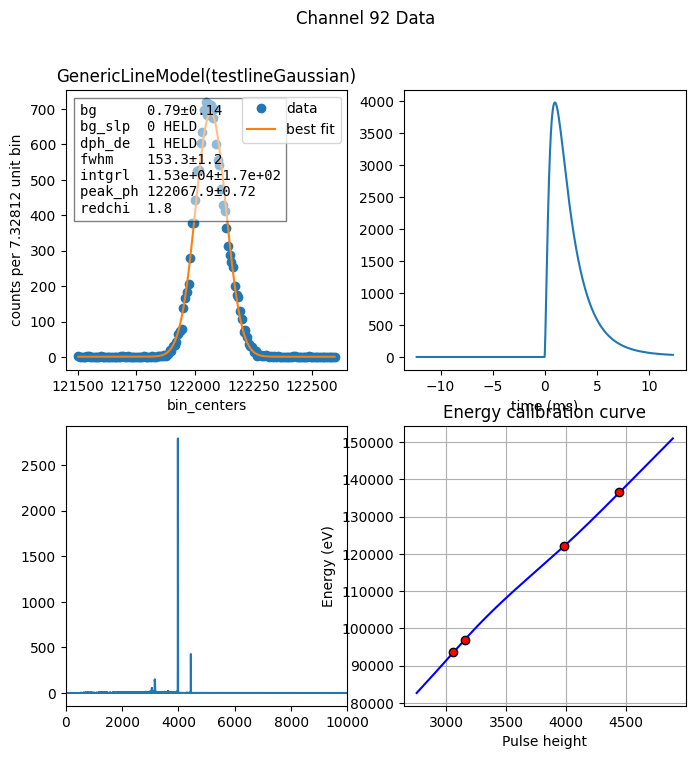

fit channel 93


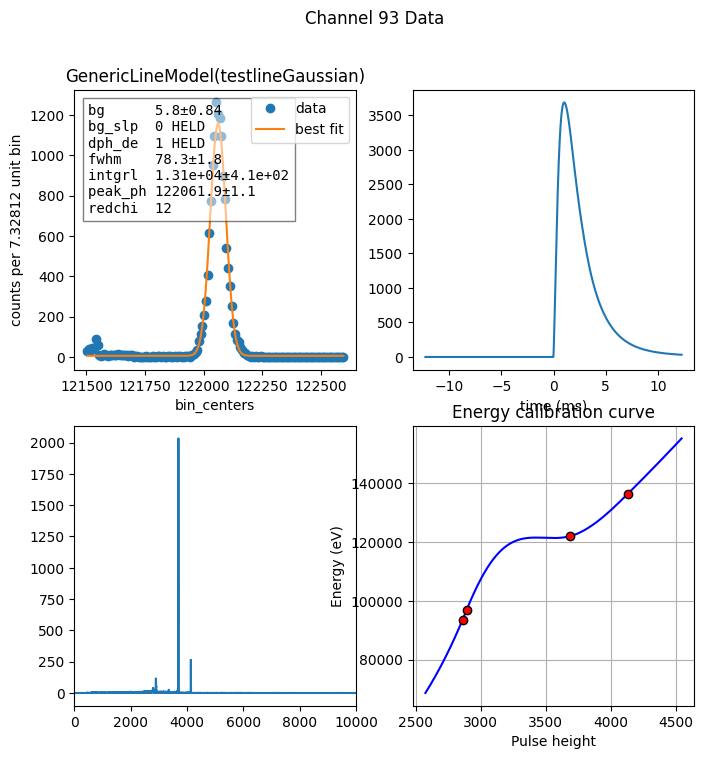

fit channel 94


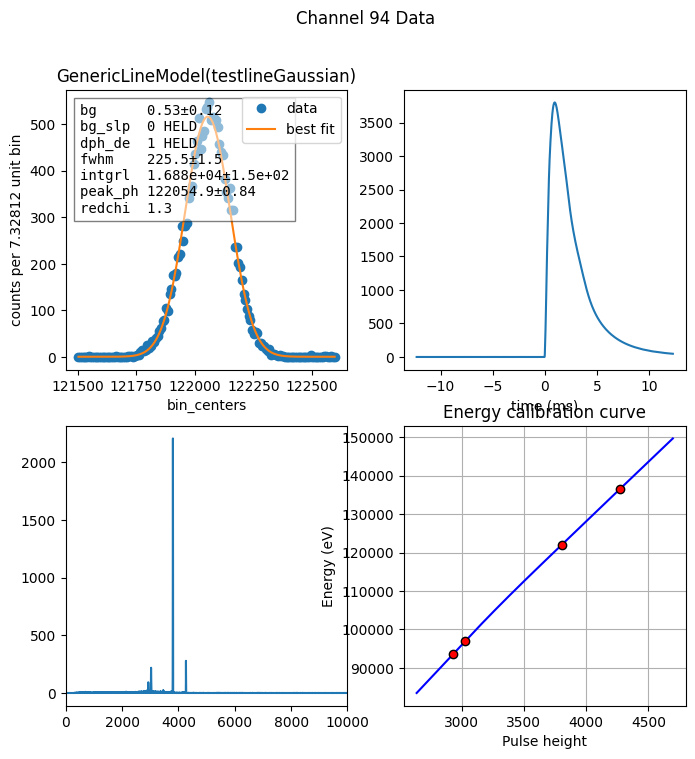

In [53]:
### try to fit 122 keV line
### want to make a summary quad plot for each channel:
### fitted lines
### average pulse shape
### pulse height histo (in arb units)
### cal curve
#
# lines = [122.06065e3,136.47356e3]

erange = [121.5e3, 122.6e3]
dE = np.zeros(len(goodcal))
dE_err = np.zeros_like(dE)

for ii,ch in enumerate(goodcal):
    ds = data.channel[ch]
    g = ds.good()
    print('fit channel '+str(ds.channum))
    
    c,be = np.histogram(ds.p_energy[g],bins=150,range=erange)
    binsize = be[1] - be[0]
    bc = be[:-1] + 0.5*binsize
    e_ctr = (erange[1] + erange[0])/2.

    line = mass.fluorescence_lines.SpectralLine.quick_monochromatic_line("testline", e_ctr, 0, 0)
    line.linetype = "Gaussian"
    model = line.model()
    # model = line.model(has_tails=True)
    params = model.guess(c, bin_centers=bc, dph_de=1)
    params["dph_de"].set(1.0, vary=False)
    #params["fwhm"].set(2.3548*sigma)

    #try:
    
    #params["dph_de"].set(1.0,vary=False) #### to hold dphde = 1
    resultA = model.fit(c,params,bin_centers=bc)
        
    fig, axes = plt.subplots(2, 2, figsize=(8,8))
    ax0, ax1, ax2, ax3 = axes.flatten()
    fig.suptitle(f'Channel {ds.channum} Data')
        
    resultA.plotm(ax=ax0)
    
    ax1.plot(dt*1e3, ds.average_pulse[:])   
    ax1.set_xlabel('time (ms)')
    #cg,bg = np.histogram(ds.p_filt_value_dc[g],bins=500,range=(0,10000))
    #pk = bg[np.argmax(cg)]
    #ax1.plot(ds.p_rise_time[g],ds.p_filt_value_dc[g],'.',ms=1)
    #ax1.set_ylim((pk*0.985,pk*1.025))
        
    cg,bg = np.histogram(ds.p_filt_value_dc[g],bins=12000,range=(0,12000))
    pk = bg[np.argmax(cg)]
    ax2.plot(bg[:-1],cg)
    ax2.set_xlim((0,10000))
    
    if ds.channum in goodcal:
        data.channel[ch].calibration['p_filt_value_dc'].plot(axis=ax3, showtext=False)
        #ax3.set_xlim((1500,4500))
    
    plt.show()
    dE[ii] = float(resultA.params["fwhm"])
    dE_err[ii] = float(resultA.params["fwhm"].stderr)

    #except:
    #    print('Failed to fit Channel %2d'%(ds.channum))
plt.close('all')

76.3235886460625
55.4599020451584


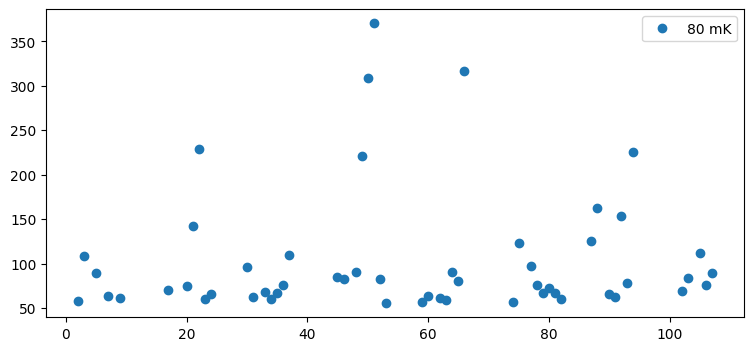

In [50]:
plt.figure(figsize=(9,4))
plt.plot(goodcal, dE, 'o',label='80 mK')
plt.legend()
#plt.ylim((100,200))
print(np.median(dE))
print(np.min(dE))

n coadded  =  47


c:\Users\kmm6\Documents\pax_data\.venv\Lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


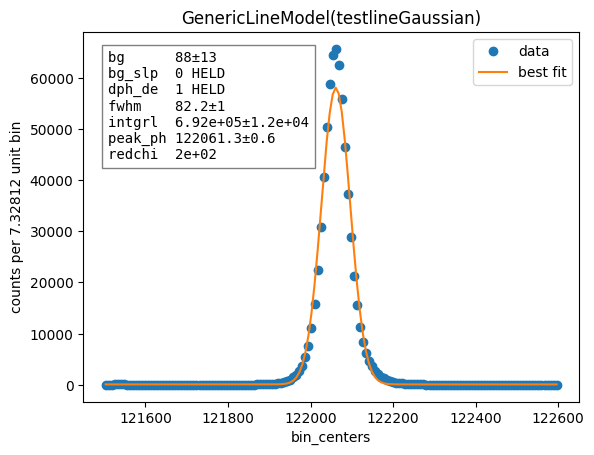

In [63]:
erange = [121.5e3, 122.6e3]
c,be = np.histogram(data.channel[103].p_energy[:],bins=150,range=erange)
binsize = be[1] - be[0]
bc = be[:-1] + 0.5*binsize
e_ctr = (erange[1] + erange[0])/2.

coadd = np.zeros_like(bc)
ncoadd = 0

for ii,ch in enumerate(goodcal):
    if dE[ii] < 200:
        ds = data.channel[ch]
        g = ds.good()
        c,b = np.histogram(ds.p_energy[g],bins=150,range=erange)
        coadd = np.add(coadd, c)
        ncoadd +=1

line = mass.fluorescence_lines.SpectralLine.quick_monochromatic_line("testline", e_ctr, 0, 0)
line.linetype = "Gaussian"
model = line.model()
# model = line.model(has_tails=True)
params = model.guess(coadd, bin_centers=bc, dph_de=1)
params["dph_de"].set(1.0, vary=False)

resultA = model.fit(coadd,params,bin_centers=bc)
print('n coadded  = ',str(ncoadd))
resultA.plotm()

In [65]:
erange = [0, 300e3]
c,be = np.histogram(data.channel[103].p_energy[:],bins=15000,range=erange)
binsize = be[1] - be[0]
bc_all = be[:-1] + 0.5*binsize
e_ctr = (erange[1] + erange[0])/2.

coadd_fullrange = np.zeros_like(bc_all)

for ii,ch in enumerate(goodcal):
    if dE[ii] < 200:
        ds = data.channel[ch]
        g = ds.good()
        c,b = np.histogram(ds.p_energy[g],bins=15000,range=erange)
        coadd_fullrange = np.add(coadd_fullrange, c)



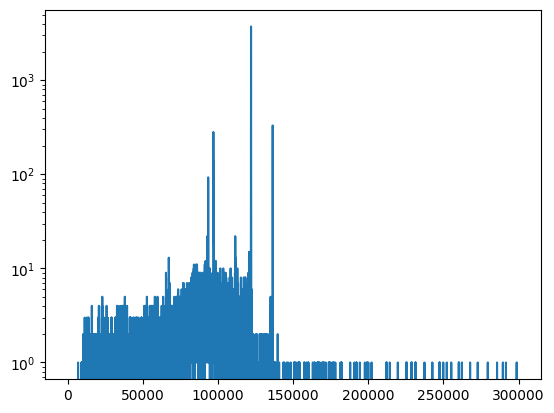

In [69]:
ch = 91
dsc = data.channel[91]
gc = dsc.good()

c,b = np.histogram(dsc.p_energy[gc],bins=15000,range=erange)
plt.semilogy(b[:-1], c)

Text(0.5, 0, 'energy (keV)')

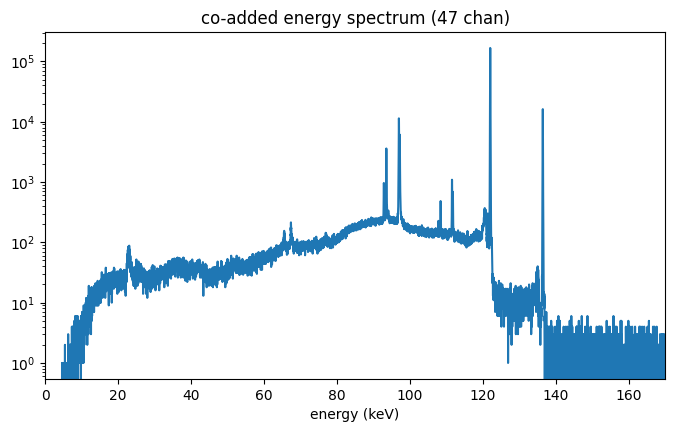

In [72]:
plt.figure(figsize=(8,4.5))

plt.semilogy(bc_all[:]/1e3, coadd_fullrange)
plt.xlim((0,170))
plt.title('co-added energy spectrum (47 chan)')
plt.xlabel('energy (keV)')

In [74]:
# (npulses, totaltime)
getrate = np.zeros((2, len(goodcal)))
for ii,ch in enumerate(goodcal):
    getrate[0,ii] = data.channel[ch].nPulses
    getrate[1,ii] = data.channel[ch].p_timestamp[-1] - data.channel[ch].p_timestamp[0]

In [77]:
print('Chan\tdE (eV)\trate (/s)\n')
rates = np.zeros(len(goodcal))
for ii, ch in enumerate(goodcal):
    print("%2d\t%5.2f\t%5.2f" % (ch, dE[ii], getrate[0,ii]/getrate[1,ii]))
    rates[ii] = getrate[0,ii]/getrate[1,ii]
print('median rate = ',np.median(rates))

Chan	dE (eV)	rate (/s)

102	69.29	 0.52
103	83.68	 0.52
105	112.38	 0.55
106	76.32	 0.56
107	90.06	 0.54
17	70.06	 0.57
 2	57.61	 0.56
20	75.27	 0.57
21	142.07	 0.59
22	229.30	 0.58
23	59.91	 0.58
24	65.99	 0.59
 3	108.21	 0.55
30	96.30	 0.59
31	62.40	 0.58
33	68.02	 0.58
34	60.74	 0.59
35	66.85	 0.59
36	76.18	 0.59
37	109.63	 0.56
45	84.75	 0.58
46	82.48	 0.59
48	90.20	 0.58
49	220.66	 0.55
 5	89.76	 0.57
50	308.99	 0.56
51	370.31	 0.53
52	82.69	 0.56
53	55.46	 0.55
59	56.64	 0.52
60	63.14	 0.56
62	61.83	 0.54
63	58.82	 0.53
64	90.76	 0.59
65	81.03	 0.51
66	317.04	 0.53
 7	64.14	 0.57
74	57.03	 0.54
75	123.41	 0.52
77	97.84	 0.55
78	75.63	 0.55
79	66.56	 0.55
80	73.13	 0.50
81	67.51	 0.52
82	60.04	 0.50
87	125.38	 0.49
88	162.47	 0.51
 9	61.65	 0.57
90	66.18	 0.53
91	62.57	 0.53
92	153.25	 0.57
93	78.28	 0.53
94	225.55	 0.58
median rate =  0.5551067703581436


In [78]:
### make a list of our favorite channels for when we want to monitor a limited number of channels
favs = [17, 34, 46, 53, 74, 81, 93, 106]

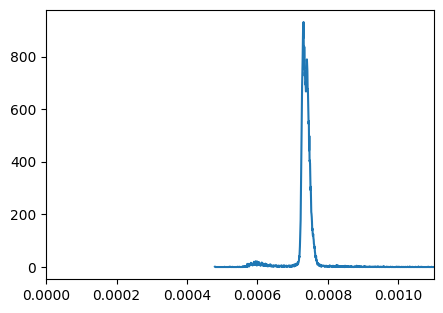

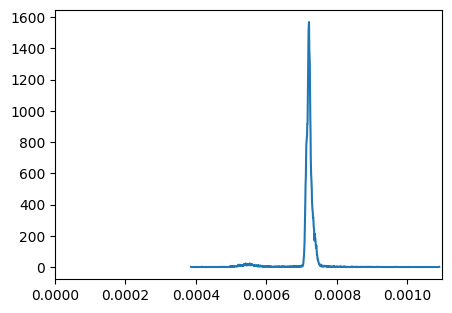

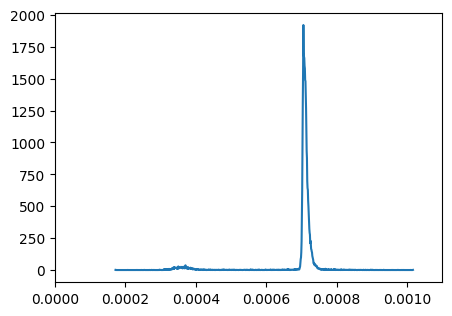

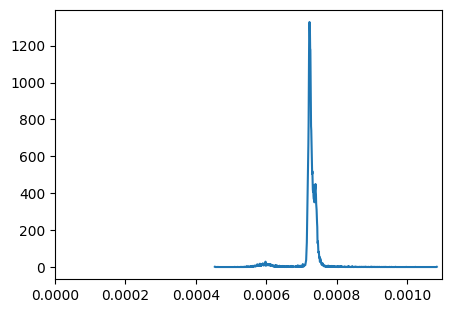

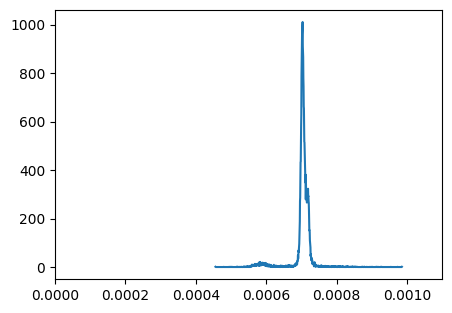

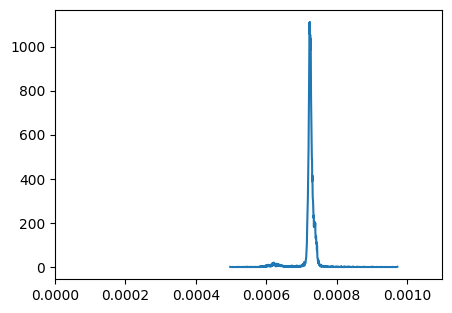

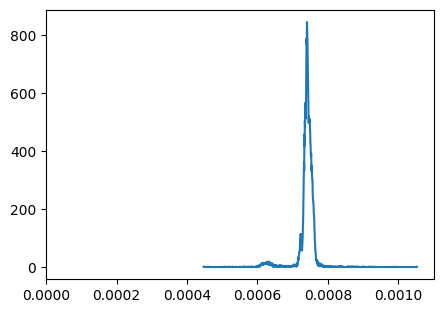

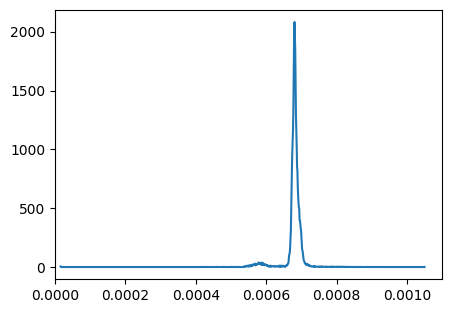

In [82]:
for ch in favs:
    ds = data.channel[ch]
    g = ds.good()
    
    c,b = np.histogram(ds.p_rise_time[g],bins=1000)
    plt.figure(figsize=(5,3.5))
    plt.plot(b[:-1], c)
    plt.xlim((0,1.1e-3))
    plt.show()
    
plt.close('all')